# Load Data

In [1]:
import pandas as pd
dataset=pd.read_csv("employee-attrition-dataset.csv")
dataset.head()
dataset.tail()

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


# import liberaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway, ttest_ind
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm

In [3]:
# Load dataset
dataset=pd.read_csv("employee-attrition-dataset.csv")
dataset

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
dataset.size

51450

In [5]:
dataset.shape

(1470, 35)

In [6]:
dataset.index

RangeIndex(start=0, stop=1470, step=1)

In [7]:
dataset.columns

Index(['ï»¿Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
dataset.columns.to_list()

['ï»¿Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [9]:
dataset.head()

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
dataset.tail()

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [11]:
dataset.info(verbose=False,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 35 entries, ï»¿Age to YearsWithCurrManager
dtypes: int64(26), object(9)
memory usage: 402.1+ KB


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ï»¿Age                    1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [13]:
dataset.describe()

,ï»¿Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
dataset.describe().columns

Index(['ï»¿Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [15]:
list(set(dataset.columns)-set(dataset.describe().columns))

['JobRole',
 'Over18',
 'EducationField',
 'Attrition',
 'Department',
 'MaritalStatus',
 'BusinessTravel',
 'OverTime',
 'Gender']

In [16]:
dataset["Gender"]

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
1465      Male
1466      Male
1467      Male
1468      Male
1469      Male
Name: Gender, Length: 1470, dtype: object

In [17]:
dataset.Gender

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
1465      Male
1466      Male
1467      Male
1468      Male
1469      Male
Name: Gender, Length: 1470, dtype: object

In [18]:
dataset[["Gender","MonthlyIncome"]]

,Gender,MonthlyIncome
0,Female,5993
1,Male,5130
2,Male,2090
3,Female,2909
4,Male,3468
...,...,...
1465,Male,2571
1466,Male,9991
1467,Male,6142
1468,Male,5390


In [19]:
dataset.nunique()

ï»¿Age                        43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [20]:
dataset["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [21]:
dataset.isnull()

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
pd.isna(dataset)

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
dataset.isnull().sum()

ï»¿Age                      0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [24]:
dataset.isnull().mean() 

ï»¿Age                      0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [25]:
dataset.isnull().mean()*100

ï»¿Age                      0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [26]:
def missing_value(dataframe):
    return round(dataframe.isnull().mean()*100,2).sort_values(ascending=False)

In [27]:
missing_value(dataset)

ï»¿Age                      0.0
StandardHours               0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StockOptionLevel            0.0
MonthlyIncome               0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInCurrentRole          0.0
YearsSinceLastPromotion     0.0
MonthlyRate                 0.0
MaritalStatus               0.0
Attrition                   0.0
EmployeeCount               0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeNumber              0.0
JobSatisfaction             0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvol

In [28]:
null=missing_value(dataset)[missing_value(dataset)>50]

In [29]:
null

Series([], dtype: float64)

In [30]:
null.index

Index([], dtype='object')

In [31]:
dataset.drop(columns=null.index,inplace=False)

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [32]:
dataset[["ï»¿Age","Attrition","BusinessTravel","DailyRate","Department","DistanceFromHome","Education","EducationField","EmployeeCount","EmployeeNumber","RelationshipSatisfaction","StandardHours","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany",
         "YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]].isnull().sum()

ï»¿Age                      0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

<Axes: >

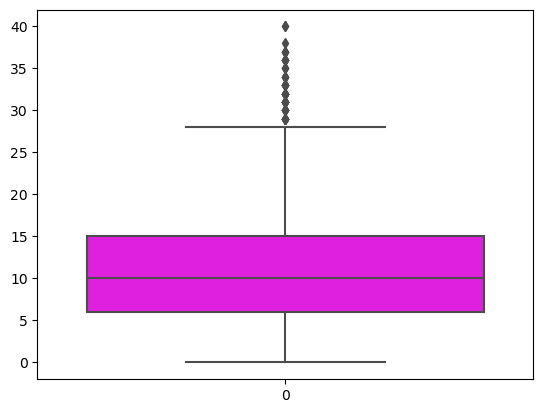

In [33]:
sns.boxplot(dataset["TotalWorkingYears"],color="magenta")

(array([165., 357., 437., 155., 119., 107.,  53.,  40.,  24.,  13.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <BarContainer object of 10 artists>)

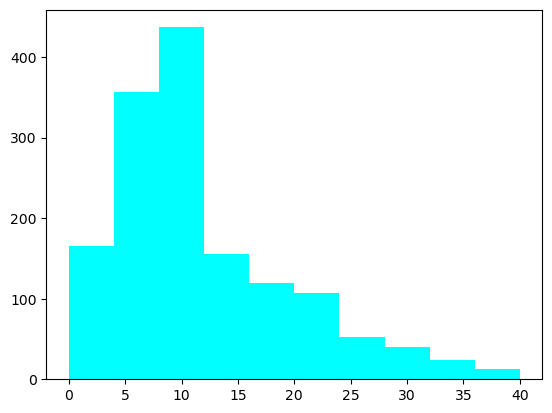

In [34]:
plt.hist(dataset["TotalWorkingYears"],color="cyan")

In [35]:
dataset["TotalWorkingYears"].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [36]:
q1=np.quantile(dataset["TotalWorkingYears"].dropna(),0.25)
q1

6.0

In [37]:
q2=np.quantile(dataset["TotalWorkingYears"].dropna(),0.50)
q2

10.0

In [38]:
q3=np.quantile(dataset["TotalWorkingYears"].dropna(),0.75)
q3

15.0

In [39]:
IQR=q3-q1
IQR

9.0

In [40]:
upper_fence=q3+1.5*(IQR)
lower_fence=1-1.5*(IQR)

In [41]:
l=[]
for i in dataset["TotalWorkingYears"]:
    if i>upper_fence  or i<lower_fence:
        l.append(i)
print(l)

[31, 29, 37, 38, 30, 40, 36, 34, 32, 33, 37, 30, 36, 31, 33, 32, 37, 31, 32, 32, 30, 34, 30, 40, 29, 35, 31, 33, 31, 29, 32, 30, 33, 30, 29, 31, 32, 33, 36, 34, 31, 36, 33, 31, 29, 33, 29, 32, 31, 35, 29, 32, 34, 36, 32, 30, 36, 29, 34, 37, 29, 29, 35]


In [42]:
missing_values = dataset.isnull().sum()
print("\nMissing Values Per Column:")
print(missing_values)


Missing Values Per Column:
ï»¿Age                      0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurre

In [43]:
dataset['MonthlyIncome'].fillna(dataset['MonthlyIncome'].median(), inplace=True)
dataset['NumCompaniesWorked'].fillna(dataset['NumCompaniesWorked'].mode(), inplace=True)

In [44]:
dataset['MonthlyIncome']

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64

(array([365., 349., 290., 109., 110.,  56.,  52.,  18.,  54.,  67.]),
 array([ 1009.,  2908.,  4807.,  6706.,  8605., 10504., 12403., 14302.,
        16201., 18100., 19999.]),
 <BarContainer object of 10 artists>)

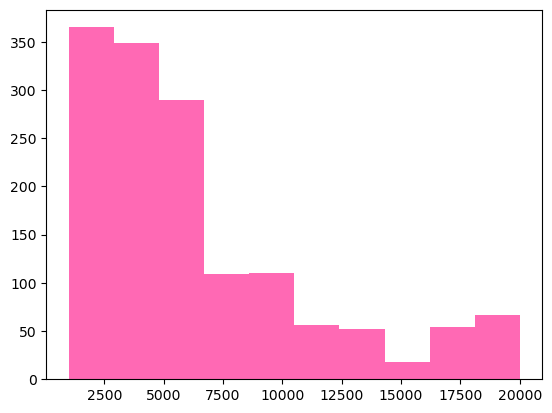

In [45]:
plt.hist(dataset["MonthlyIncome"],color="hotpink")

In [46]:
dataset['NumCompaniesWorked']

0       8
1       1
2       6
3       1
4       9
       ..
1465    4
1466    4
1467    1
1468    2
1469    2
Name: NumCompaniesWorked, Length: 1470, dtype: int64

<Axes: >

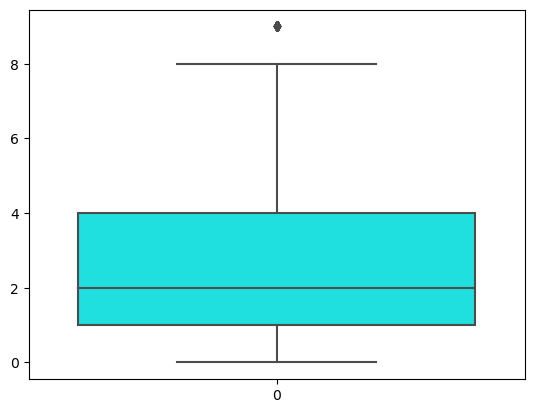

In [47]:
sns.boxplot(dataset["NumCompaniesWorked"],color="cyan")

In [48]:
dataset.dropna(subset=['Department'], inplace=True)
dataset['Department']

0                        Sales
1       Research & Development
2       Research & Development
3       Research & Development
4       Research & Development
                 ...          
1465    Research & Development
1466    Research & Development
1467    Research & Development
1468                     Sales
1469    Research & Development
Name: Department, Length: 1470, dtype: object

(array([446.,   0.,   0.,   0.,   0., 961.,   0.,   0.,   0.,  63.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

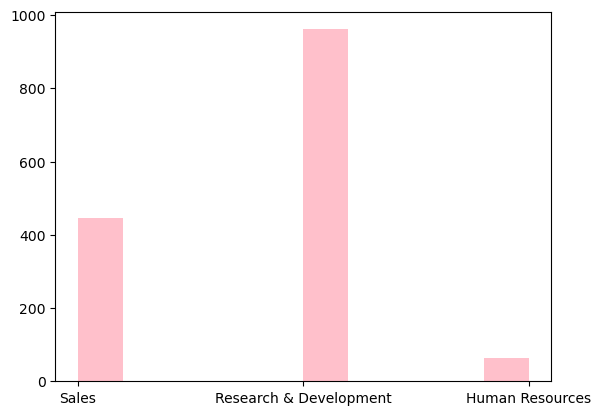

In [49]:
plt.hist(dataset["Department"],color="pink")

# Drop columns that are irrelevant

In [50]:
# List of columns to drop
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID']

# Drop columns if they exist in the dataset
dataset.drop(columns=[col for col in columns_to_drop if col in dataset.columns], axis=1, inplace=True)

# Display remaining columns
print("\nColumns after dropping irrelevant ones:")
print(dataset.columns)



Columns after dropping irrelevant ones:
Index(['ï»¿Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [51]:
# Map categorical variables to numeric
# dataset['Attrition'] = dataset['Attrition'].map({'Yes': 1, 'No': 0})
# dataset['OverTime'] = dataset['OverTime'].map({'Yes': 1, 'No': 0})
# dataset['Department'] = dataset['Department'].map({ 'Sales': 1, 'Research & Development': 2, 'Human Resources': 3})


In [52]:
print(dataset.head())

   ï»¿Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                 3                  

In [53]:
dataset['AgeGroup'] = pd.cut(dataset['ï»¿Age'], bins=[18, 30, 40, 50, 60], labels=['18-30', '30-40', '40-50', '50-60'])
dataset['YearsAtCompanyBins'] = pd.cut(dataset['YearsAtCompany'], bins=[0, 1, 5, 10, 20, 40], 
                                     labels=['<1', '1-5', '5-10', '10-20', '>20'])
print("Data cleaning and preprocessing complete.")

Data cleaning and preprocessing complete.


In [54]:
dataset['AgeGroup']

0       40-50
1       40-50
2       30-40
3       30-40
4       18-30
        ...  
1465    30-40
1466    30-40
1467    18-30
1468    40-50
1469    30-40
Name: AgeGroup, Length: 1470, dtype: category
Categories (4, object): ['18-30' < '30-40' < '40-50' < '50-60']

In [55]:
dataset['YearsAtCompanyBins']

0       5-10
1       5-10
2        NaN
3       5-10
4        1-5
        ... 
1465     1-5
1466    5-10
1467    5-10
1468    5-10
1469     1-5
Name: YearsAtCompanyBins, Length: 1470, dtype: category
Categories (5, object): ['<1' < '1-5' < '5-10' < '10-20' < '>20']

# Re-importing all liberaries for perform analysis


In [56]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# introduction of project 

ATTRITION --> Attrition of employees from organization for any reason or in simple words we can say that emplpyees who wants to 
leave the company

ATTRITION "YES"-->Employee wants to leave the company.

ATTRITON "NO"-->Eemployee don't want to leave the company

# domain analysis

1.AGE

Age of an employee

2.BUSSINESS TRAVEL

That employee is travelling or not for bussines purpose

3.DEPARTMENT

In which department of company employee is working

4.DISTANCE FROM HOME

that how much distance is there of an employee from his/her house to office

5.HOURLY/DAILY/MONTHLY RATING

Rating given to employee on daily,hourly and montly basis

6.EDUCATION FIELD

from which education background employee belongs to

7.JOB AND ENVIRONMENT SATISFACTION

It is that employee is satisfiedd with their job as well as (given in 1-5 rating)

8.JOB INVOLVEMENT

How much employee is involvment in his work(given in rating 1-5)

9.JOB LEVEL

Level of job,higher rating==higher job level

10.PERFORMANCE RATING

How employee is performing according to his job(given rating 1-5)

11.MONTHLY INCOME

Monthly salary of an employee in doller

12.PERCEMTAGE SALARY HIKE

How many percent salary in incresing anually



In [57]:
dataset.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


In [58]:
dataset.describe()

,ï»¿Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Analysis on categorical data

TARGET COLUMN==ATTRITION

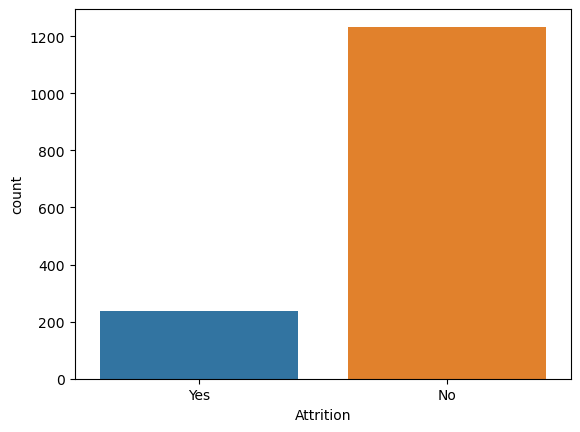

In [59]:
sns.countplot(x=dataset.Attrition)
plt.show()

-->Data  of attrition says that it has more number of"No" values and less number of "Yes"

-->It can be seen that there is big diffrence in counts of the values so we can says that it is IMBALANCE DATA

# 1  IMPACT OF BUSSINES TRAVEL ON ATTRITION

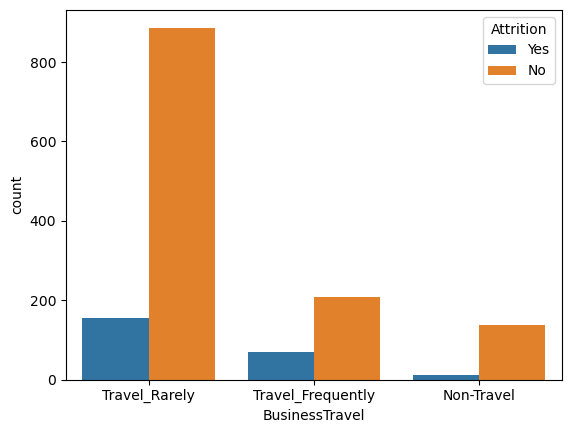

In [60]:
sns.countplot(hue=dataset.Attrition,x=dataset.BusinessTravel)
plt.show()

-->The graph tell us that company has more count or more no of employees travel rearly

-->There are more employees travel rearly and not satisfied with their jobs

-->Non-traveller have least count as well as least attrition

# 2 IMPACT OF DEPARTMENT ON ATTRITION 

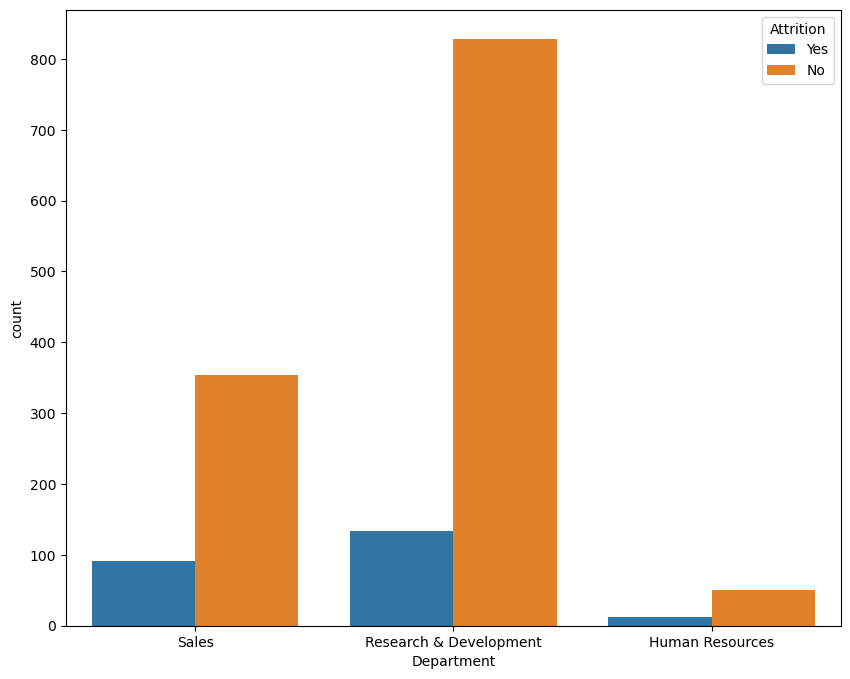

In [61]:
plt.figure(figsize=(10,8))
sns.countplot(hue=dataset.Attrition,x=dataset.Department)
plt.show()

-->There are 3 no. of department are there = 1.Sales,2.Research & Development,3.Human Resources

-->"Research & Development" department have more number of department of Attrition(150 employees)as compare to other two department

-->"HR Department" have least Attrition with 5 to 10 employees

# 3 IMPACT OF EDUCATION ON ATTRITION

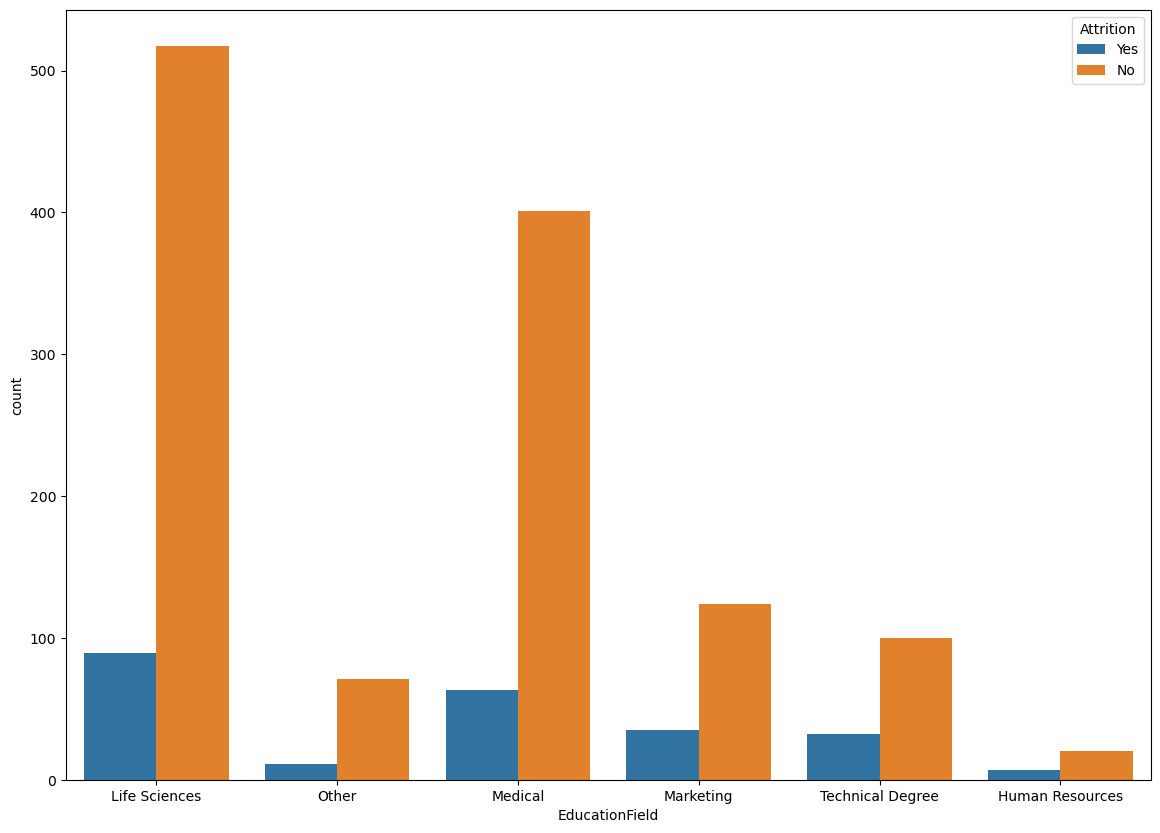

In [62]:
plt.figure(figsize=(14,10))
sns.countplot(hue=dataset.Attrition,x=dataset.EducationField)
plt.show()

-->First and foremost things is that Employees are from "life science" and "Medical" background are more as comapre to other education field

--> Nearly 100 number of employee are there who are from Lifes Sciences education background will leave the company and follow the Medical education employees

-->As we conclude from analysis of Department and Attrition .here also HR education background employees have least Attrition 

# 4. IMPACT GENDER ON ATTRITION  

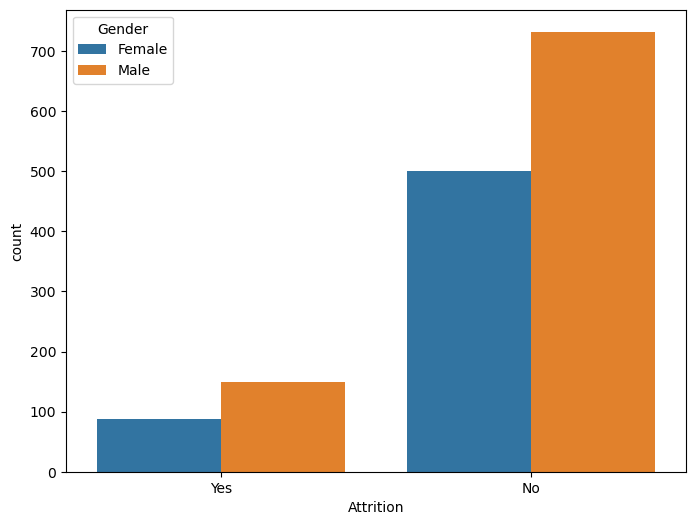

In [63]:
plt.figure(figsize=(8,6))
sns.countplot(x=dataset.Attrition,hue=dataset.Gender)
plt.show()

--> Male employees are more as compared to Female employees

--> Males are more likely to quit rather than Females

# 5 OVERTIME AND ATTRITION 

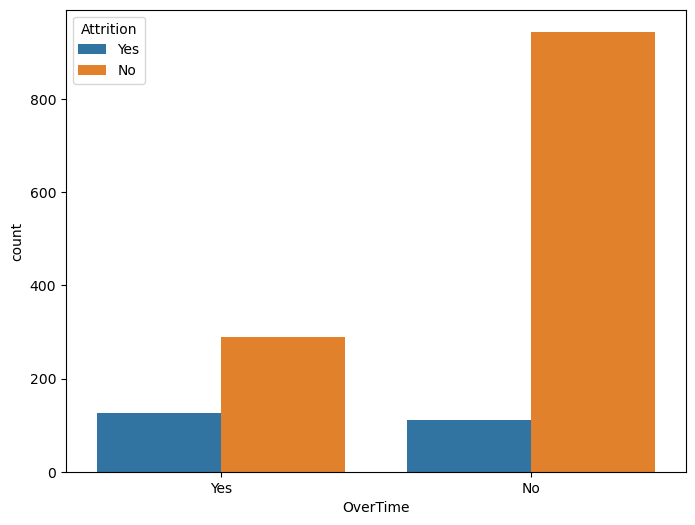

In [64]:
plt.figure(figsize=(8,6))
sns.countplot(hue=dataset.Attrition,x=dataset.OverTime)
plt.show()

--> As for "Attrition yes" there is the minor diffrents between Employees who are doing OverTime and who are not doing OverTime

--> So we can say overtime feature is not mutch effecting Attrition 

--> But we can conclude that most of employees are not doing overtime

# 6 IMPACT OF JOBOLE ON ATTRITION 

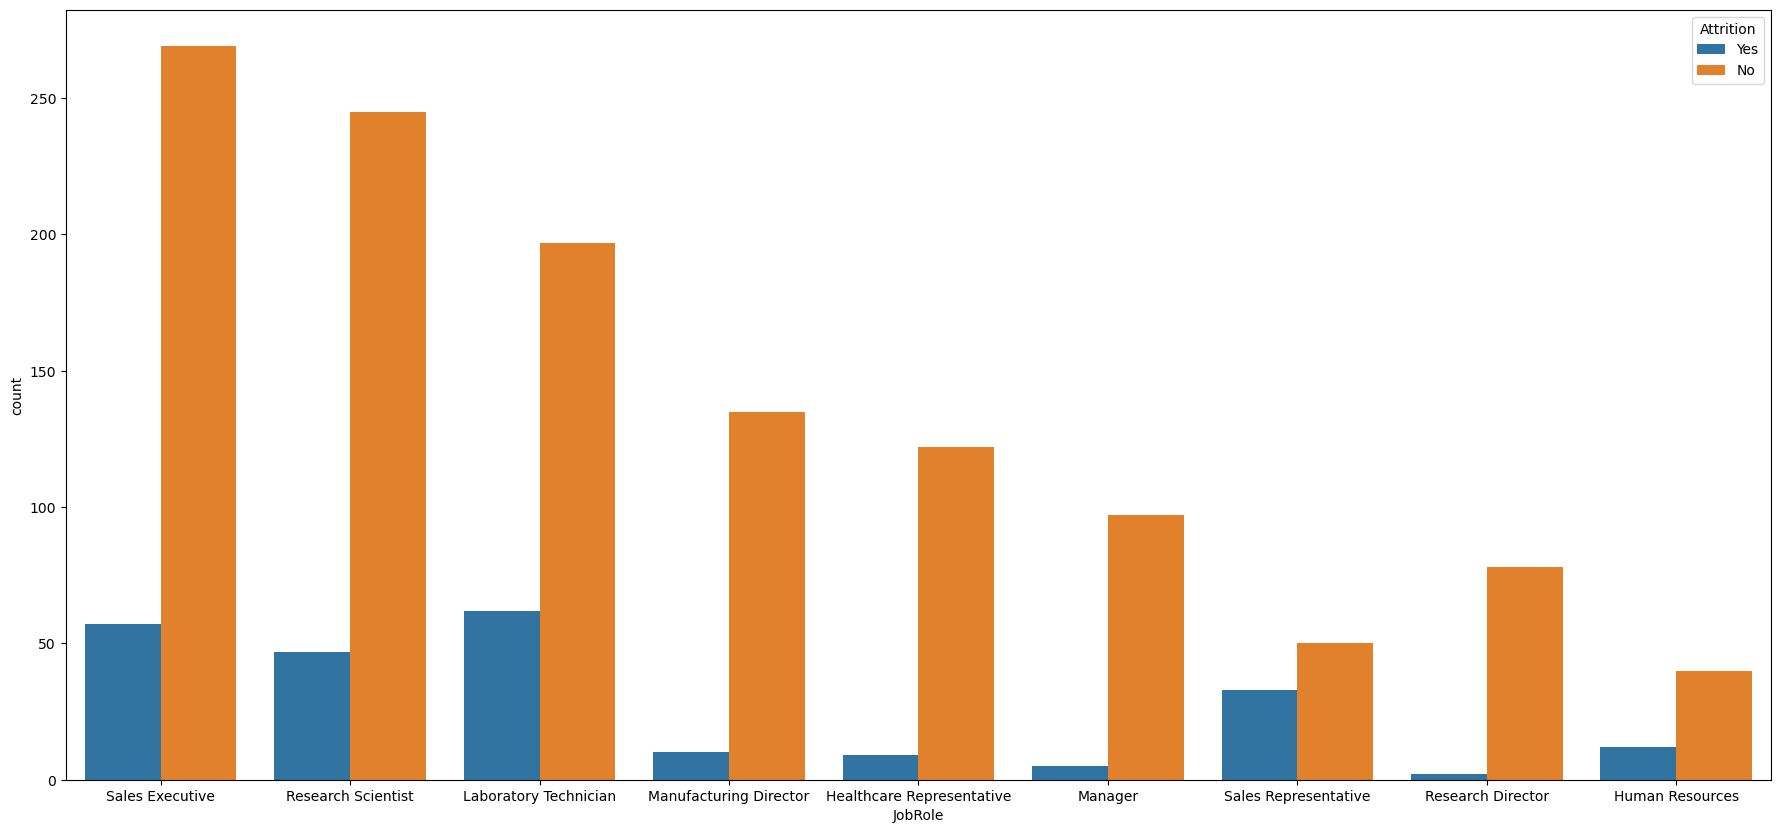

In [65]:
plt.figure(figsize=(22,10),facecolor='white')
sns.countplot(x=dataset.JobRole,hue=dataset.Attrition)
plt.show()

--> There is less no of Research director who leaves the company

-->Laboratory technician , sales executive and reasearch scientist are the top 3job roles in which employees have their "Attrition yes"

-->It can also seen that more number of employees in sales executive job role

# ANALYSIS ON CONTINUOS DATA WITH RESPECT TO TARGET COLUMN

In [66]:
numerical_col=[]
for column in dataset.columns:
    if dataset[column].dtype=="int64" and len(dataset[column].unique())>=10:
        numerical_col.append(column)

In [67]:
numerical_col

['ï»¿Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# graphical repesentation of continuos data

In [68]:
dataset2=dataset[
    ['ï»¿Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']]

# Another method of visualization 

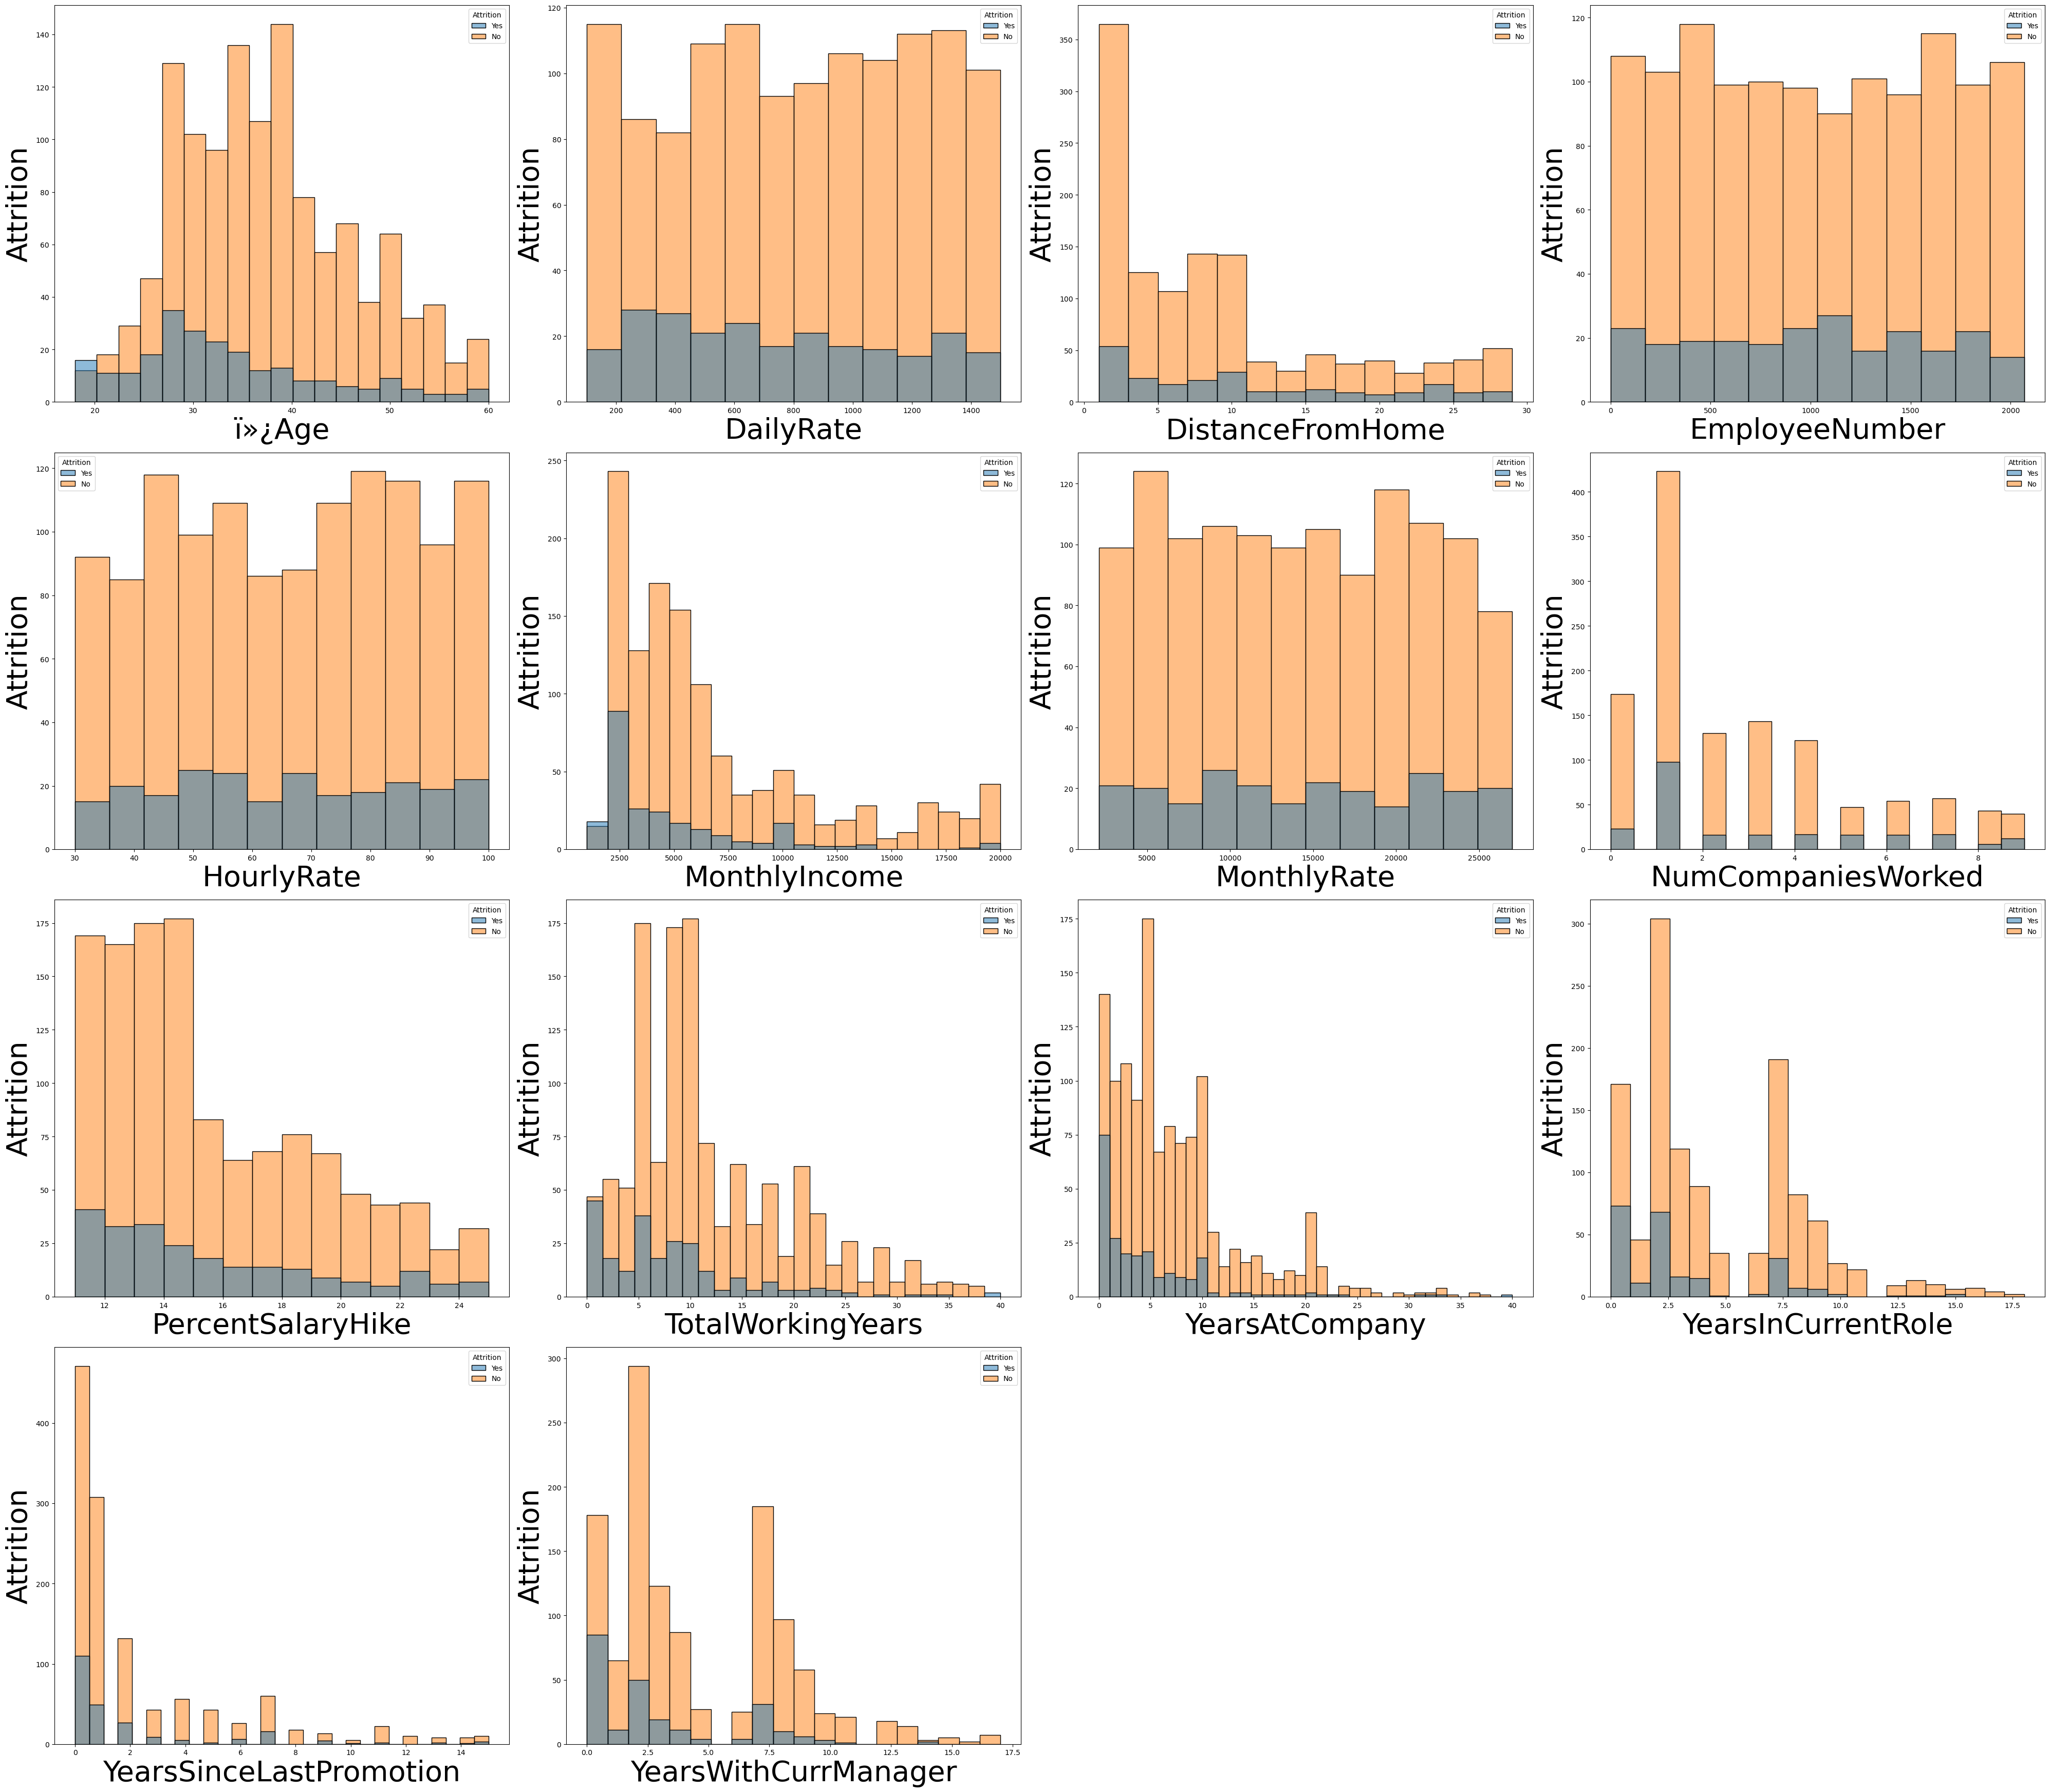

In [69]:
plt.figure(figsize=(40,35),facecolor='white')
plotnumber = 1

for column in dataset2:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.histplot(x=dataset2[column].dropna(axis=0),hue=dataset.Attrition)
        
        plt.xlabel(column,fontsize=40)
        plt.ylabel('Attrition',fontsize=40)
    plotnumber+=1
plt.tight_layout()

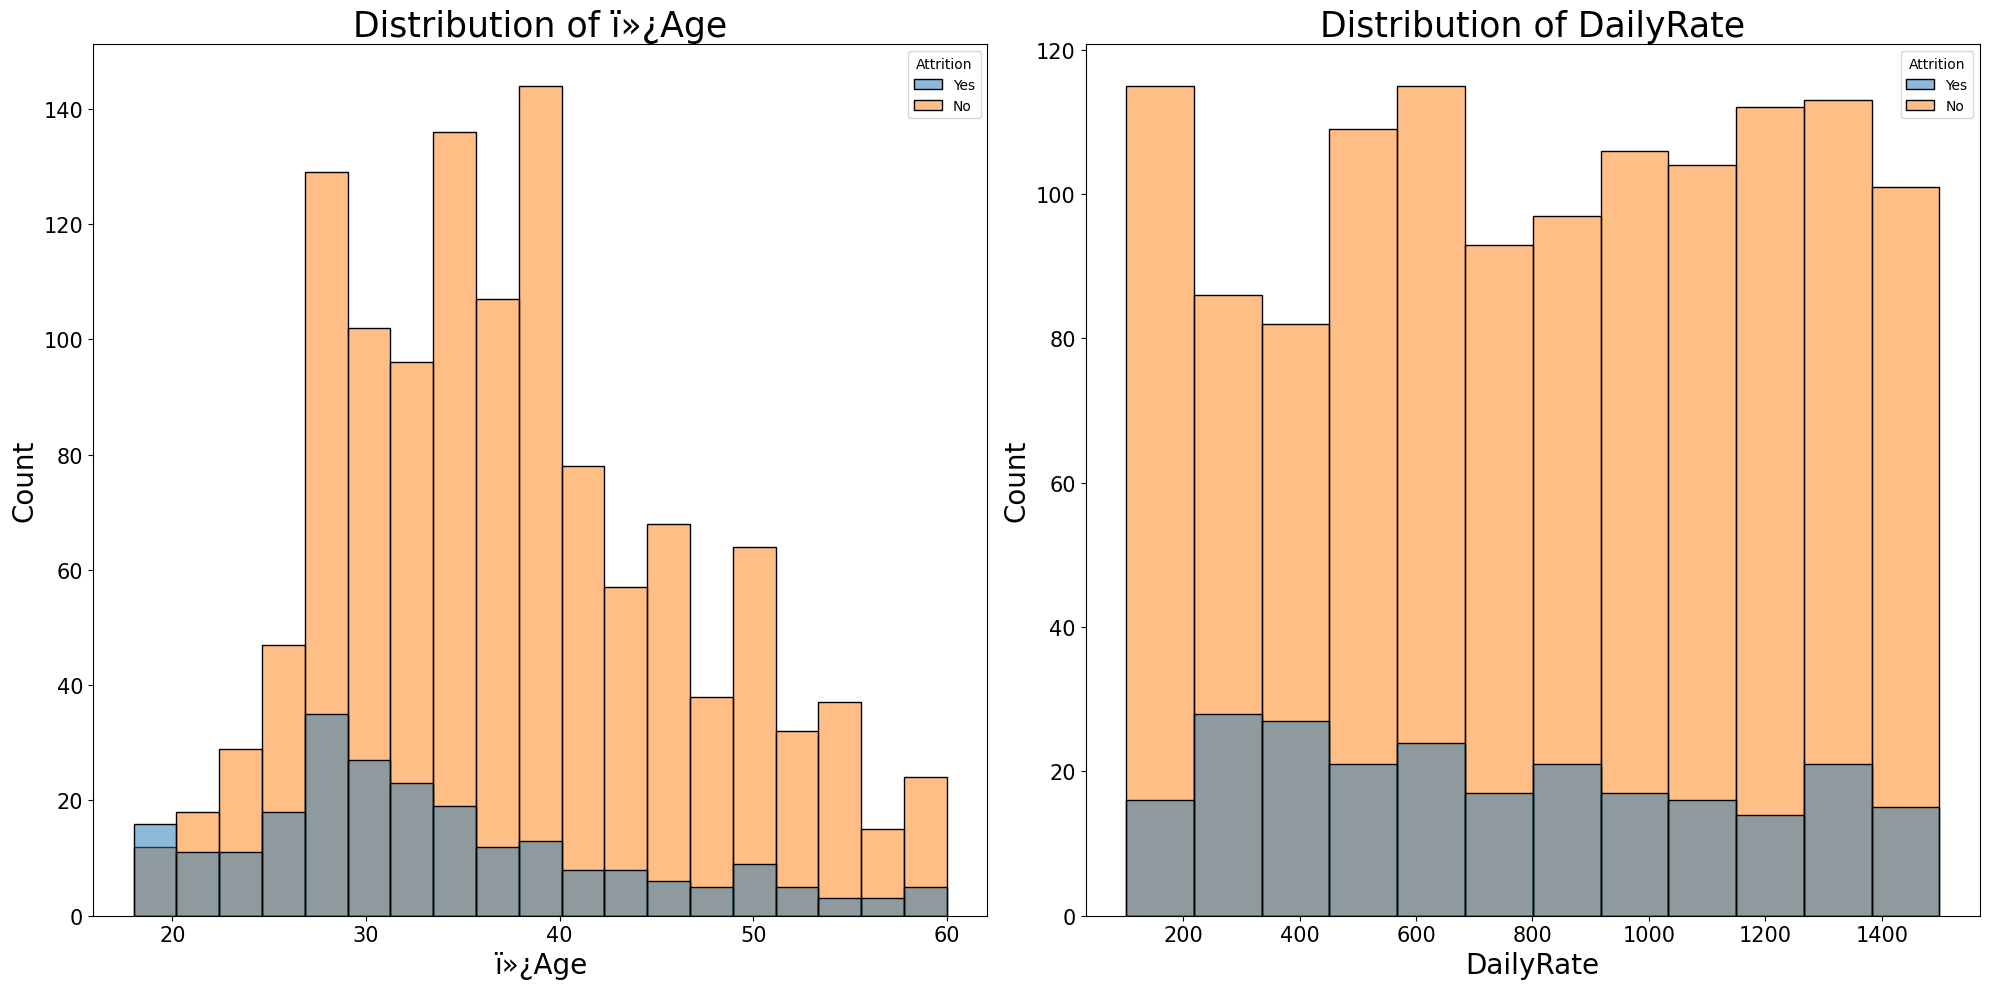

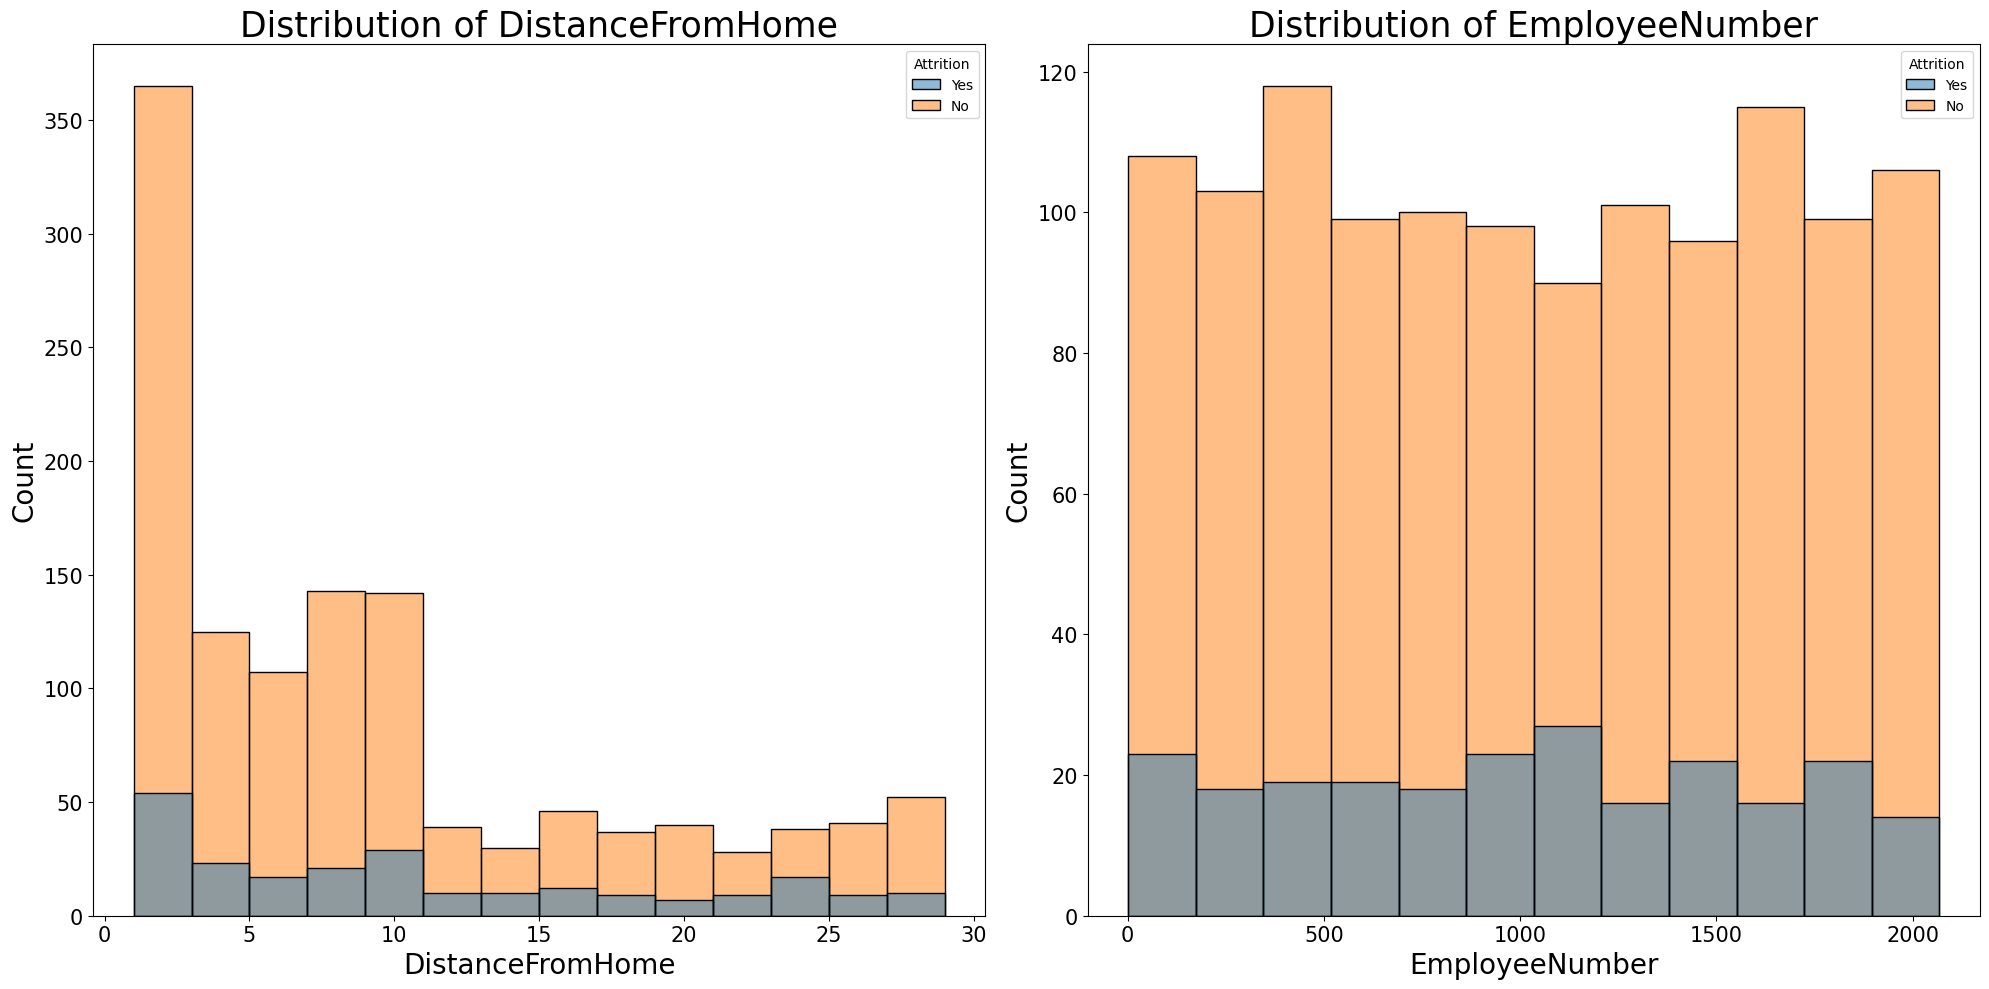

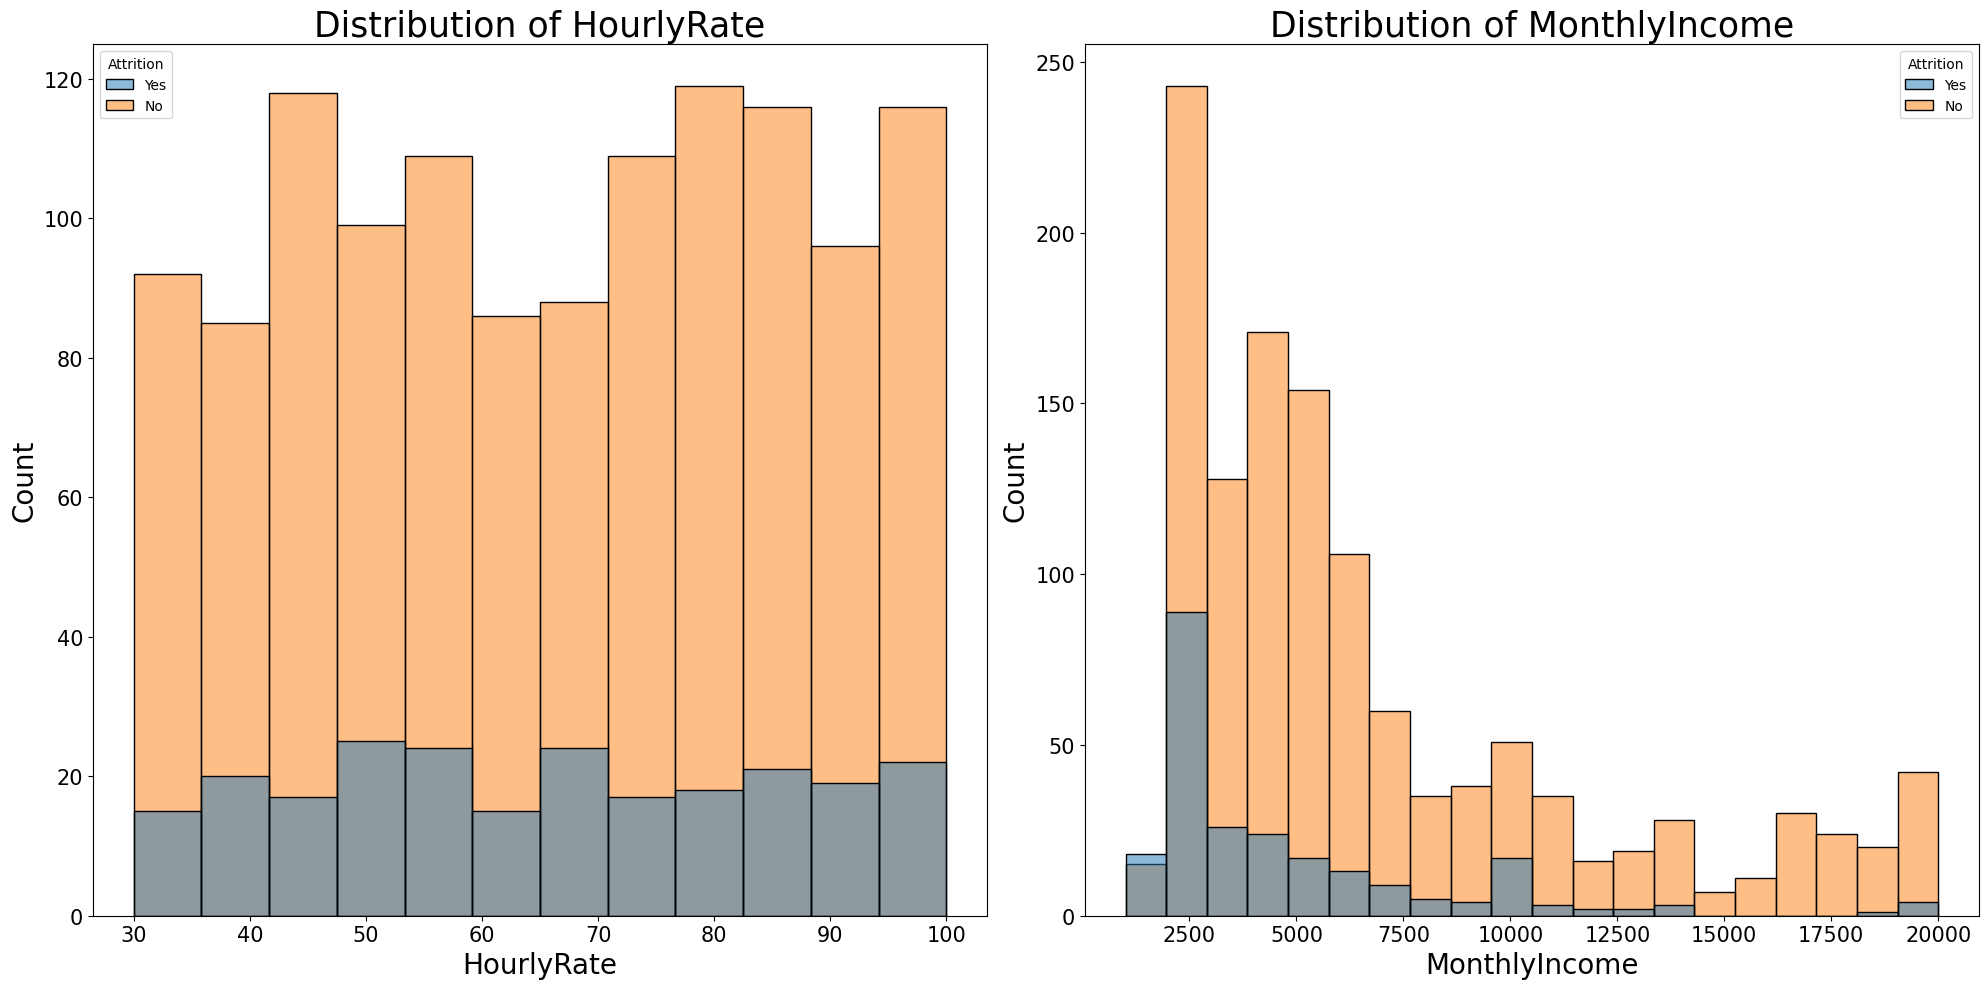

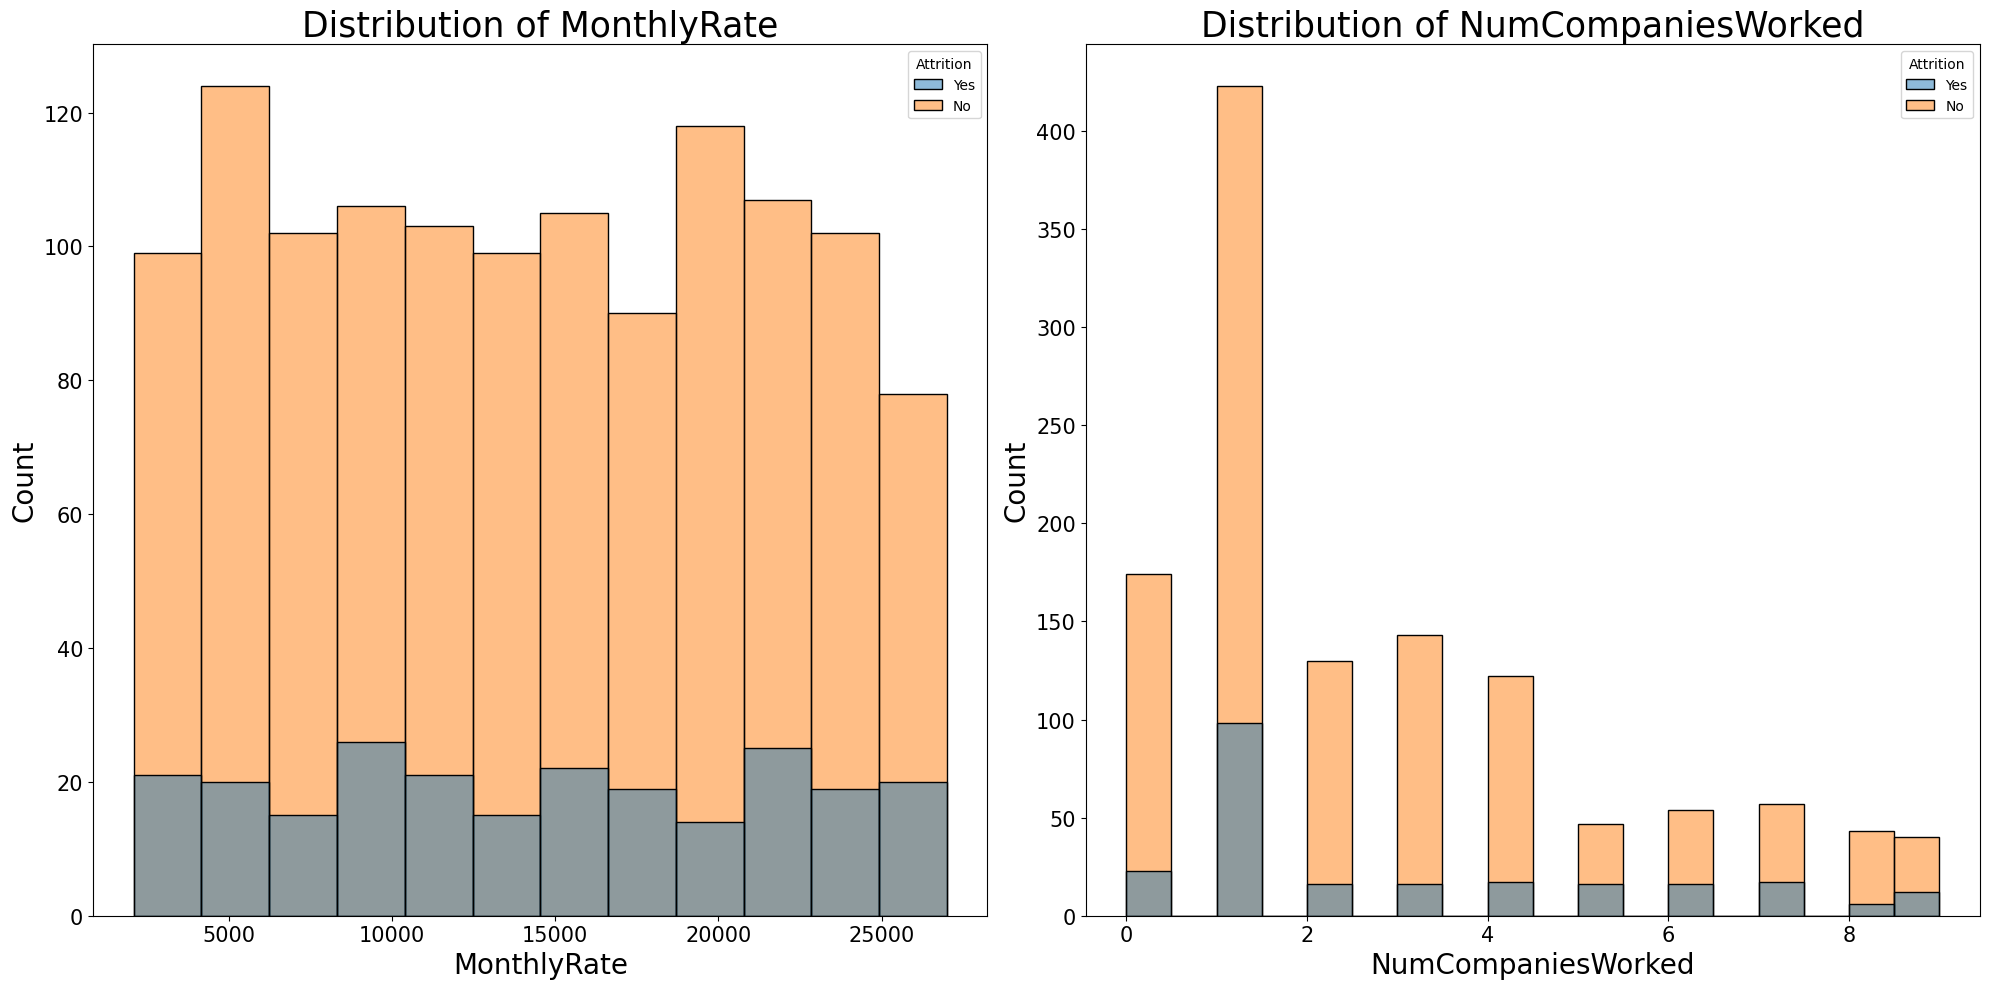

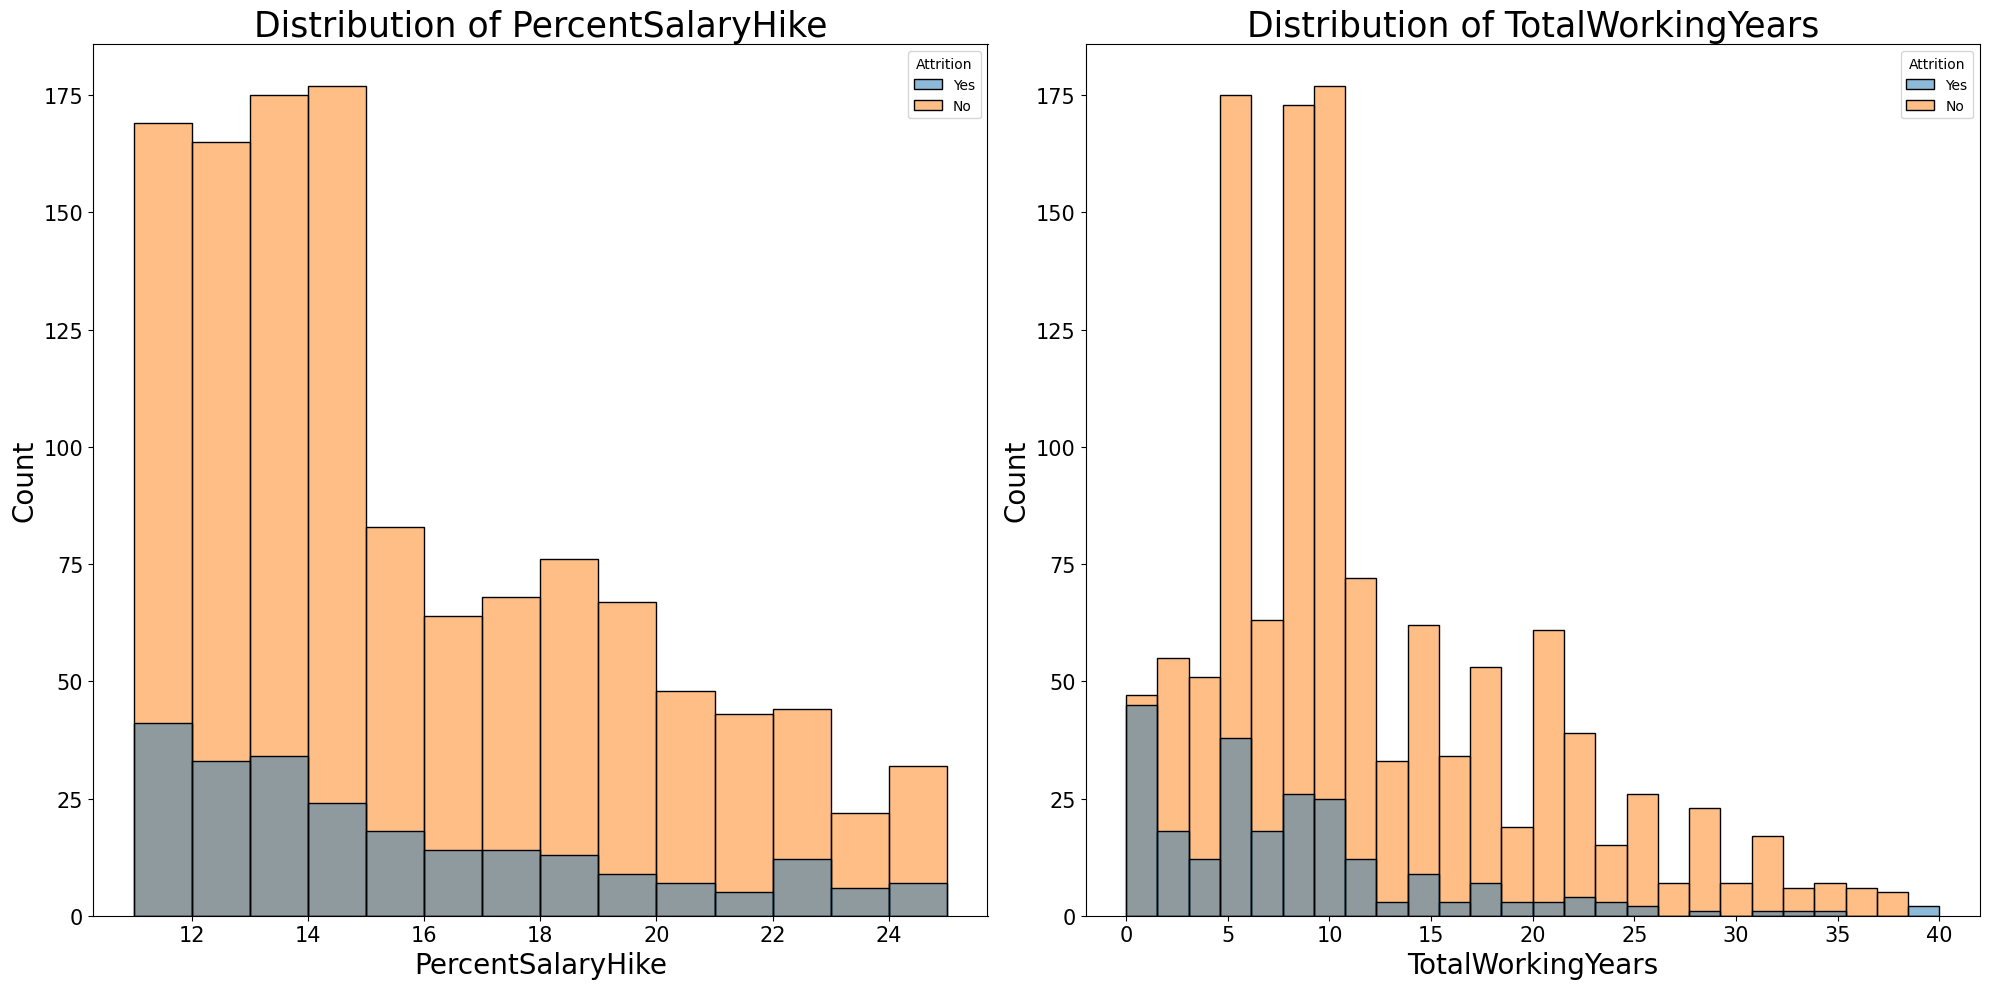

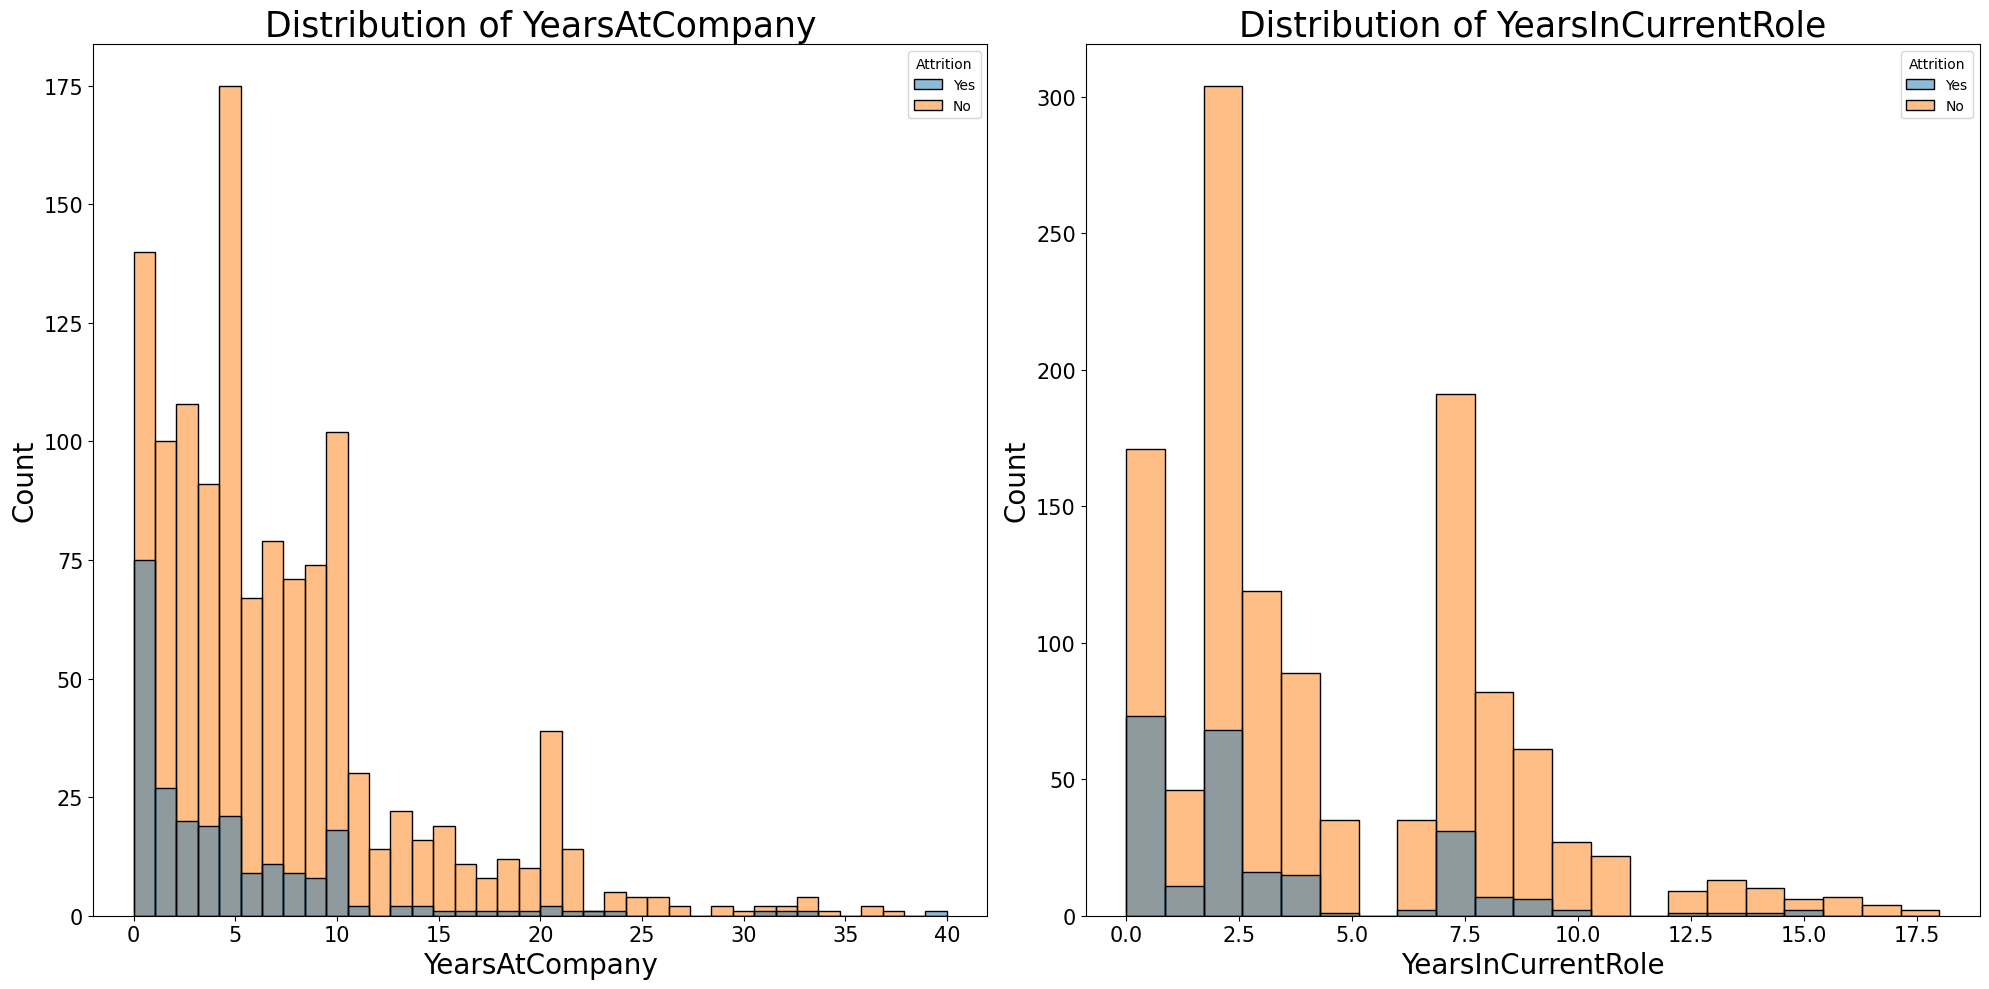

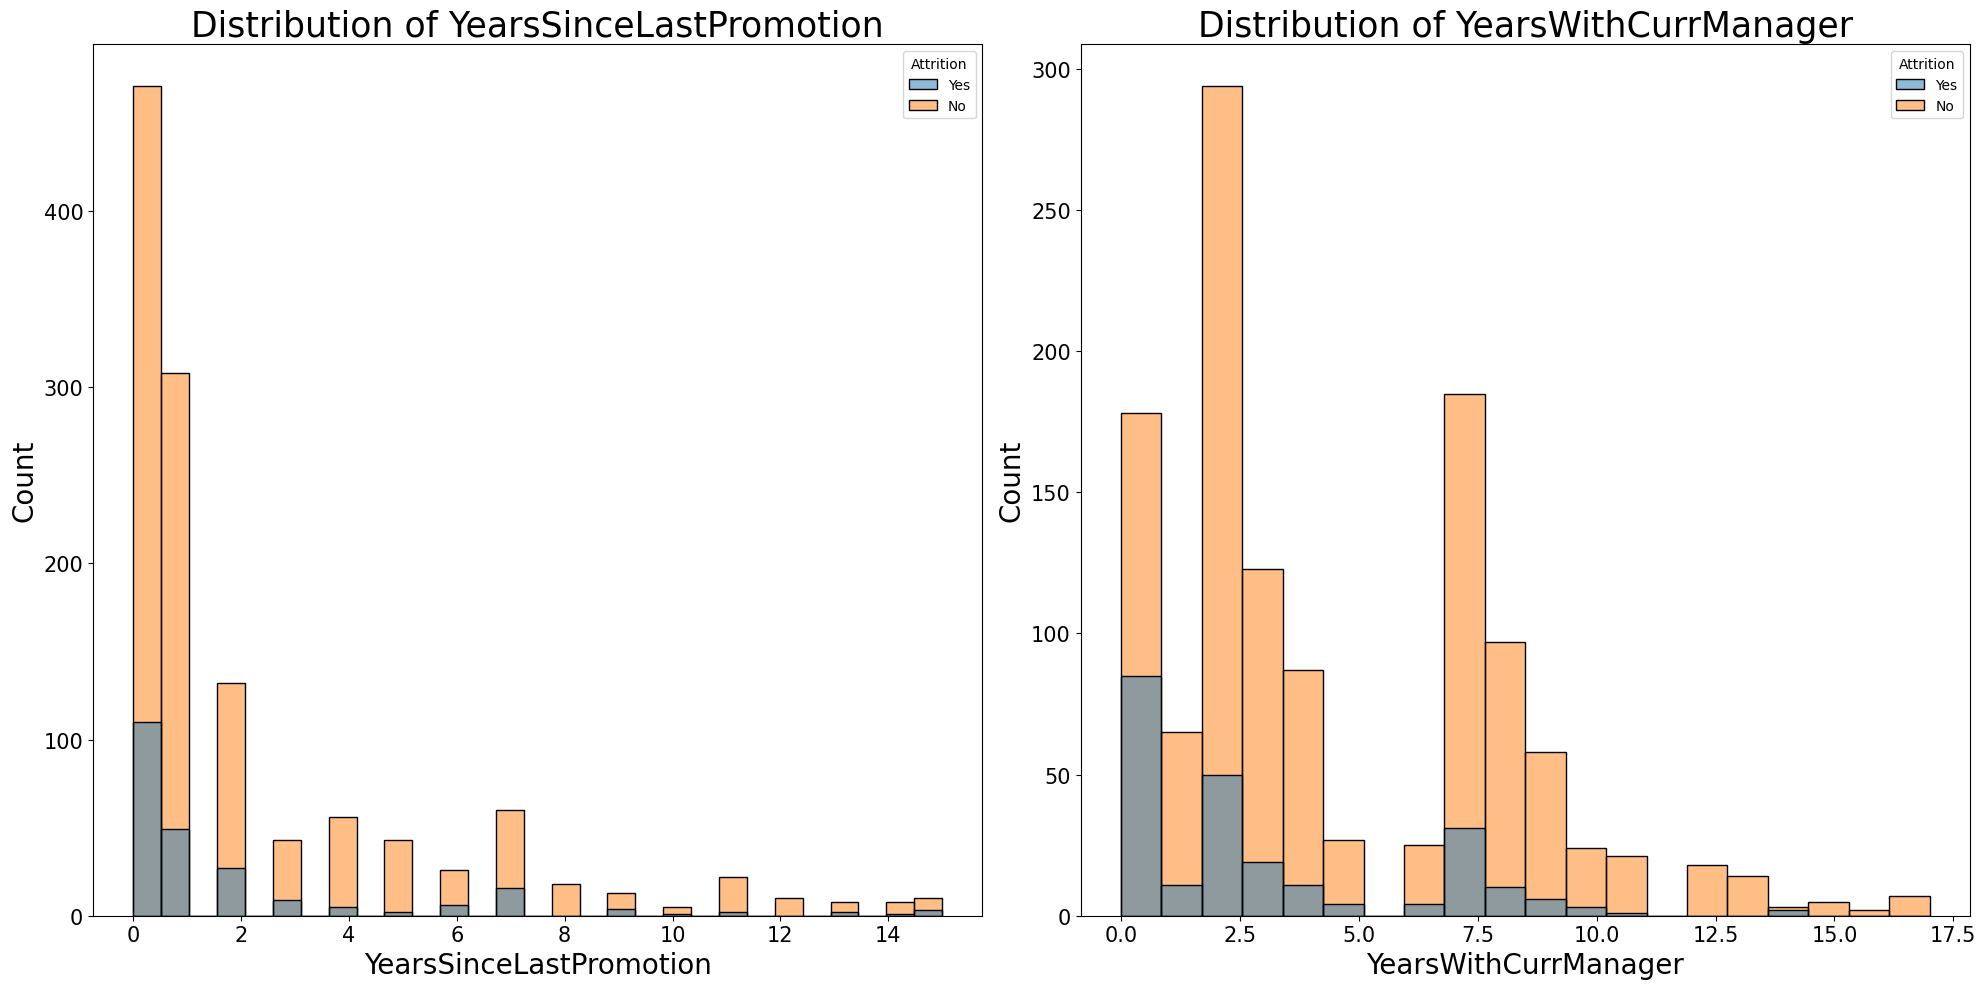

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_in_pairs(dataset2, hue_column):
    columns = dataset2.columns
    num_columns = len(columns)
    pair_count = 2 

    for i in range(0, num_columns, pair_count):
        plt.figure(figsize=(20, 10), facecolor='white') 

        for j in range(pair_count):
            if i + j < num_columns:  
                ax = plt.subplot(1, pair_count, j + 1) 
                
                sns.histplot(
                    x=dataset2[columns[i + j]].dropna(), 
                    hue=hue_column, 
                    kde=False, 
                    ax=ax
                )
                
                plt.xlabel(columns[i + j], fontsize=20)
                plt.ylabel('Count', fontsize=20)
                ax.set_title(f'Distribution of {columns[i + j]}', fontsize=25)
                ax.tick_params(axis='both', which='major', labelsize=15)
        
        plt.tight_layout()
        plt.show()

plot_in_pairs(dataset2, hue_column=dataset.Attrition)


# 1 IMPACT OF AGE ON ATTRITION

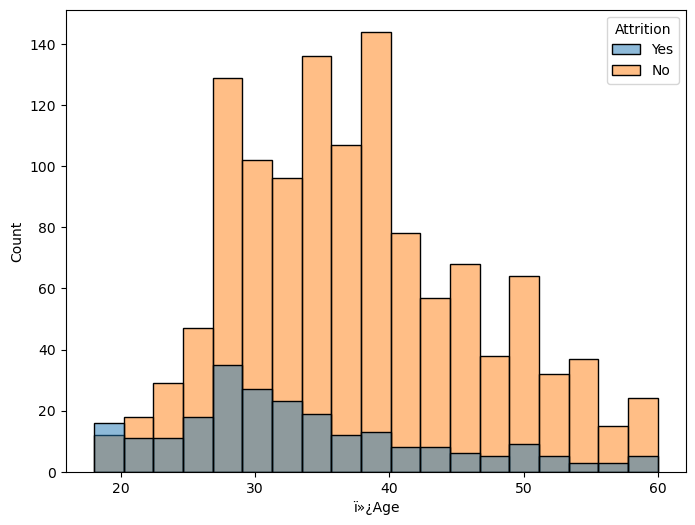

In [71]:
plt.figure(figsize=(8,6),facecolor='white')
sns.histplot(x=dataset['ï»¿Age'],hue=dataset.Attrition)
plt.show()

-->Employees in age 25 to 35 are more likely to  leave their job

-->After the age 40. the distribution tell us that "Higher the age lesser will we Attrition"

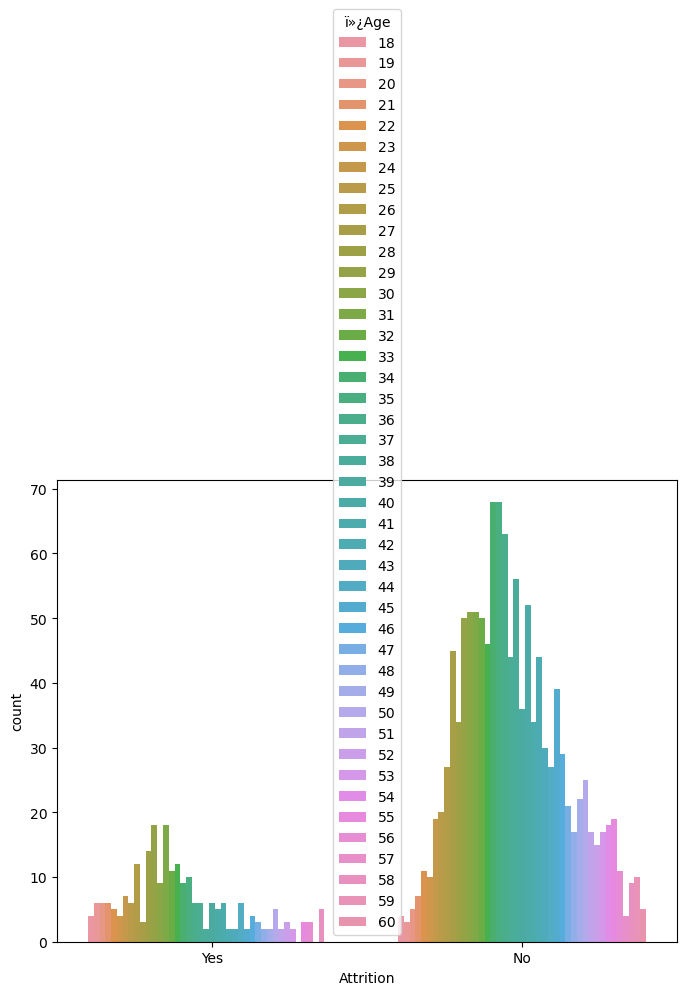

In [72]:
plt.figure(figsize=(8,6),facecolor='white')
sns.countplot(hue=dataset['ï»¿Age'],x=dataset.Attrition)
plt.show()

# 2 DISTANCE FROM HOME AND ATTRITION 

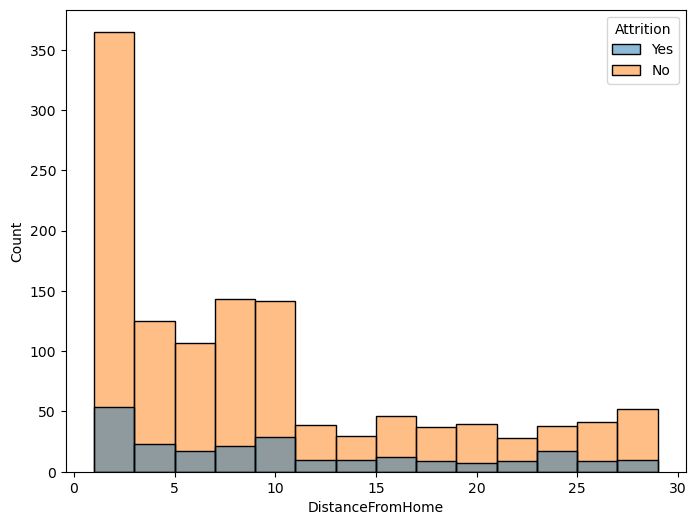

In [73]:
plt.figure(figsize=(8,6),facecolor='white')
sns.histplot(x=dataset.DistanceFromHome,hue=dataset.Attrition)
plt.show()

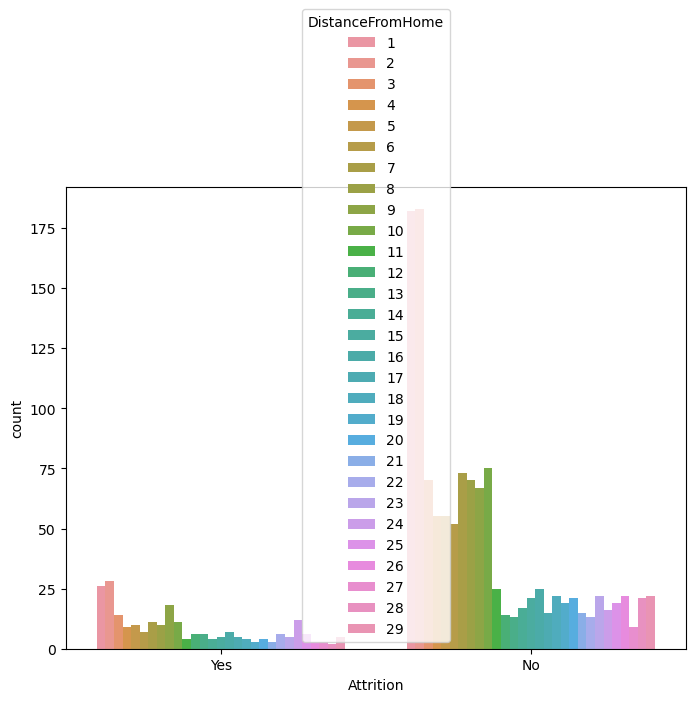

In [74]:
plt.figure(figsize=(8,6),facecolor='white')
sns.countplot(hue=dataset.DistanceFromHome,x=dataset.Attrition)
plt.show()

--> Employees who has distance range "0-100" km are more likely to leave their job.

--> we can also conclude that lesser the distance more number of employees working.

# 3 how monthly income give trends with respect to attrition 

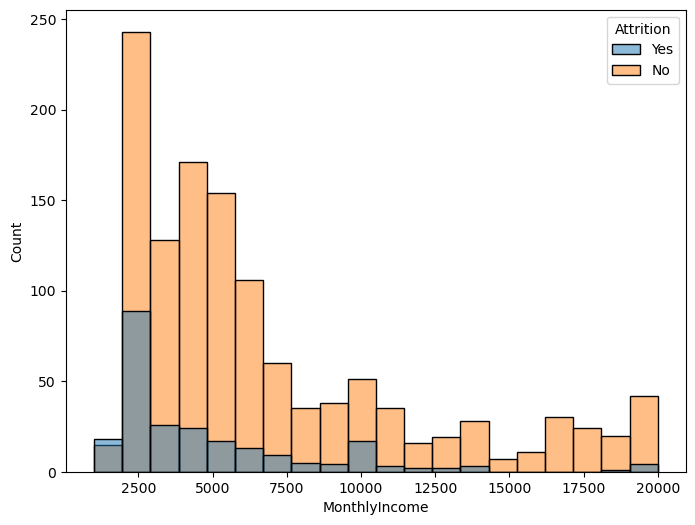

In [75]:
plt.figure(figsize=(8,6),facecolor='white')
sns.histplot(x=dataset.MonthlyIncome,hue=dataset.Attrition)
plt.show()

--> Higher the monthly income give rise to less Attrition (means Attrition "no")

--> Employees who have their income 2500 aprox are more likely to quit their job because 2500 is the least range of income

# 4.IMPACT OF NO. OF COMPANIES WORKED

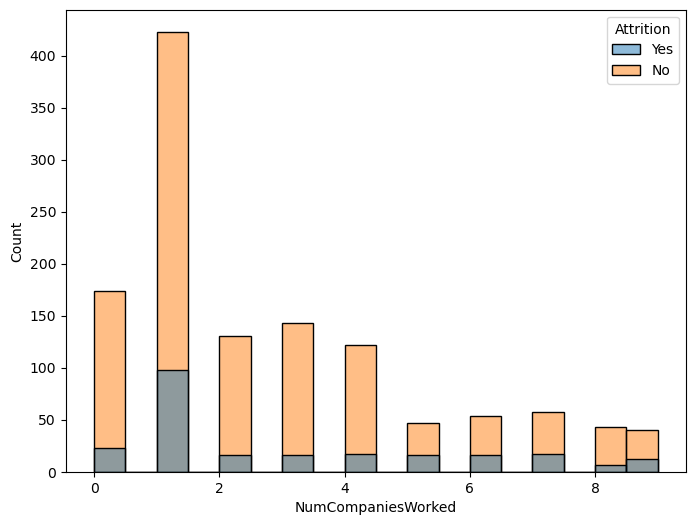

In [76]:
plt.figure(figsize=(8,6),facecolor='white')
sns.histplot(x=dataset.NumCompaniesWorked,hue=dataset.Attrition)
plt.show()

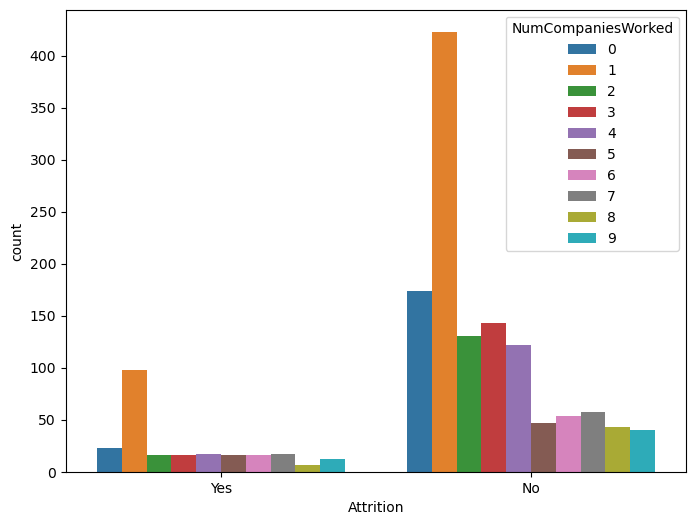

In [77]:
plt.figure(figsize=(8,6),facecolor='white')
sns.countplot(hue=dataset.NumCompaniesWorked,x=dataset.Attrition)
plt.show()

--> Olny the employees(no. of employees=100) who work with one company before have more (Attrition yes) rest have similar data

# 5 HOW SALARY HIKE IMPACT  THE ATTRITION 

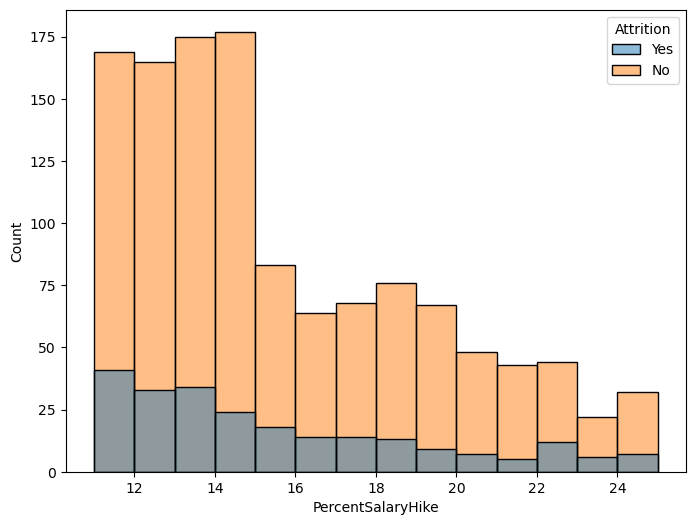

In [78]:
plt.figure(figsize=(8,6),facecolor='white')
sns.histplot(x=dataset.PercentSalaryHike,hue=dataset.Attrition)
plt.show()

--> Higher the salary percentage hike lesser the Attrition ("no")

# 6 YEAR AT  THE COMPANY

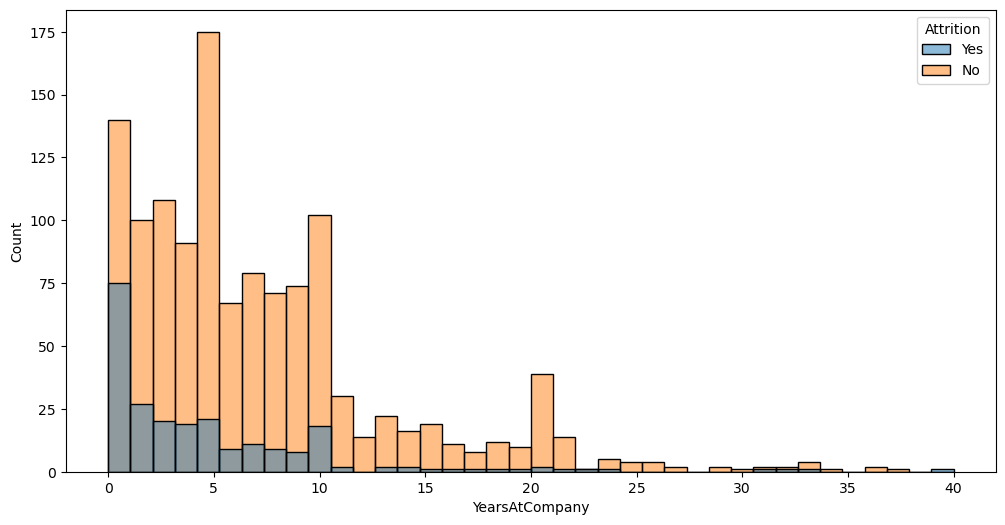

In [93]:
plt.figure(figsize=(12,6),facecolor='white')
sns.histplot(x=dataset.	YearsAtCompany,hue=dataset.Attrition)
plt.show()

--> Fresher have higher Attrition "yes" that is of 75 no. of workers are more than half of  feshers

--> Apart from employees who ranges fron 1 to 10 years working on company are less likely to quit their job.

# ANALYSIS OF DISCRETE  DATA WITH RESPWCT TO TARGET COLUMN

In [80]:
discrete_col=[]
for column in dataset.columns:
    if dataset[column].dtype=="int64" and len(dataset[column].unique())>=10:
        discrete_col.append(column)

In [81]:
discrete_col

['ï»¿Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [82]:
dataset.describe()

,ï»¿Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [83]:
dataset3=dataset[[
    'Education',
    'EmployeeNumber',
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobLevel',
    'JobSatisfaction',
     'NumCompaniesWorked',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'TrainingTimesLastYear',
    'WorkLifeBalance'
]]

In [84]:
dataset3

,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,2,1,2,3,2,4,8,3,1,0,0,1
1,1,2,3,2,2,2,1,4,4,1,3,3
2,2,4,4,2,1,3,6,3,2,0,3,3
3,4,5,4,3,1,3,1,3,3,0,3,3
4,1,7,1,3,1,2,9,3,4,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,2061,3,4,2,4,4,3,3,1,3,3
1466,1,2062,4,2,3,1,4,3,1,1,5,3
1467,3,2064,2,4,2,2,1,4,2,1,0,3
1468,3,2065,4,2,2,2,2,3,4,0,3,2


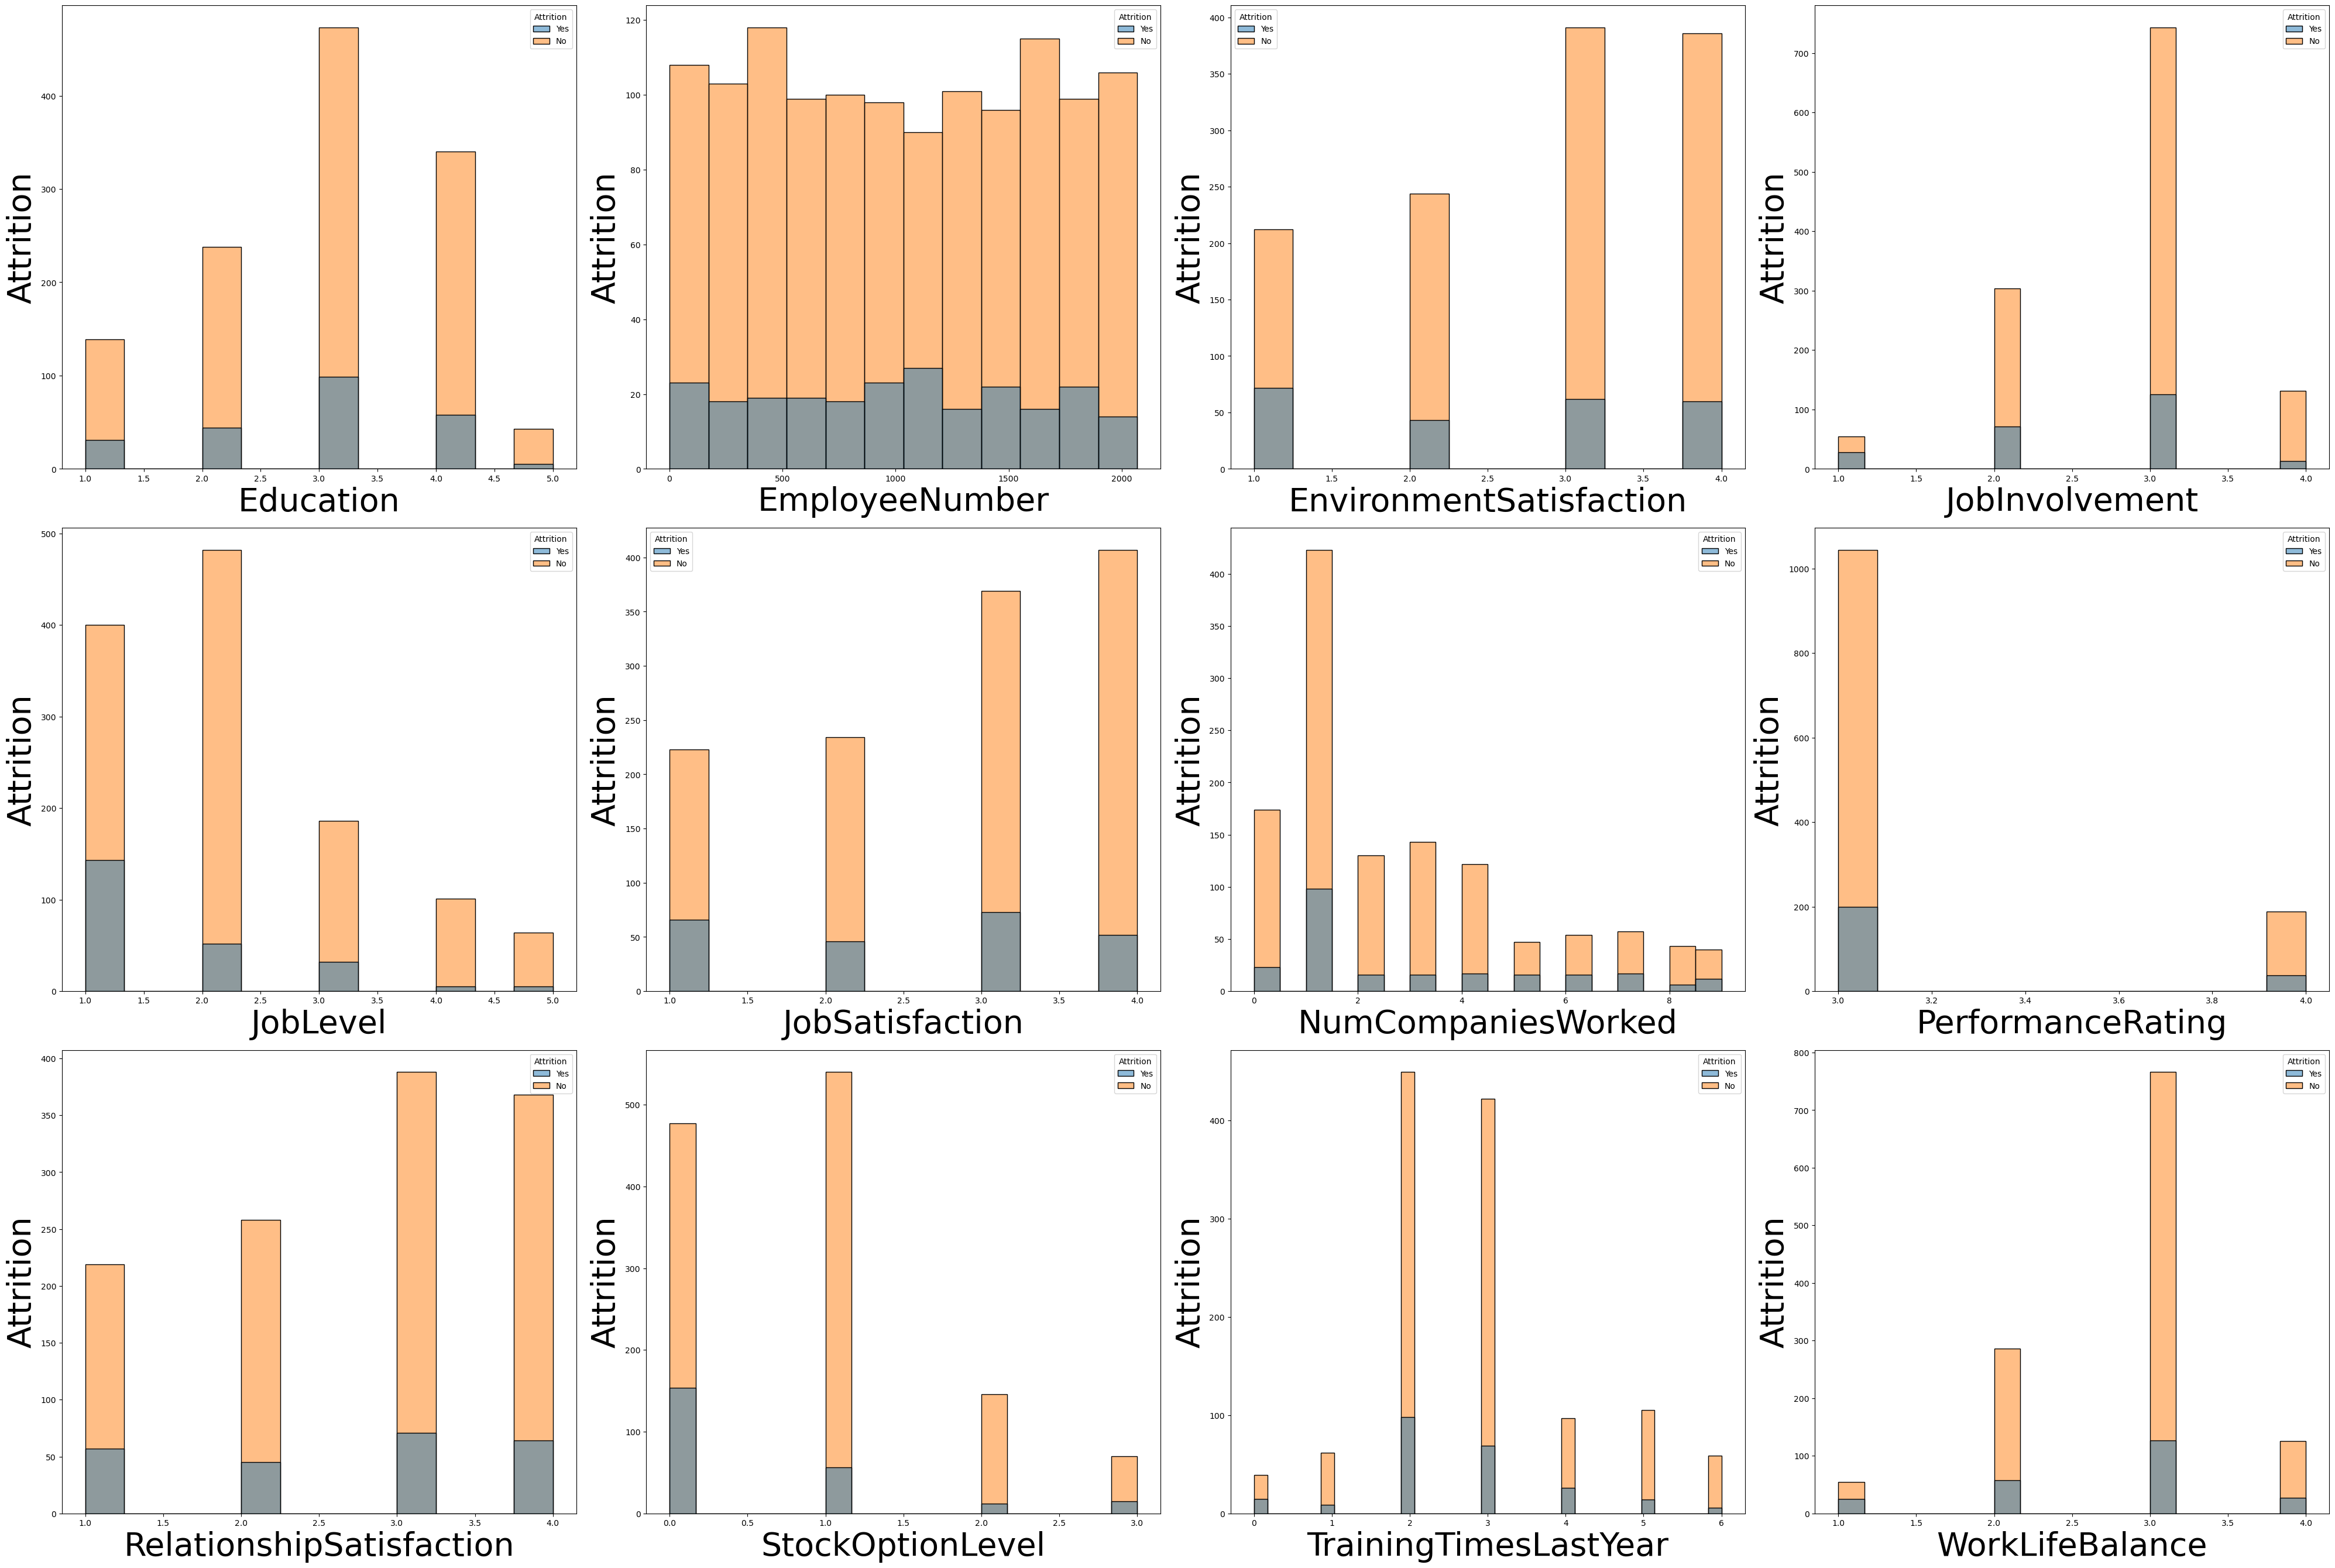

In [85]:
plt.figure(figsize=(40,35),facecolor='white')
plotnumber = 1

for column in dataset3:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.histplot(x=dataset3[column].dropna(axis=0),hue=dataset.Attrition)
        
        plt.xlabel(column,fontsize=40)
        plt.ylabel('Attrition',fontsize=40)
    plotnumber+=1
plt.tight_layout()

# GRAPHICAL REPSENTATION

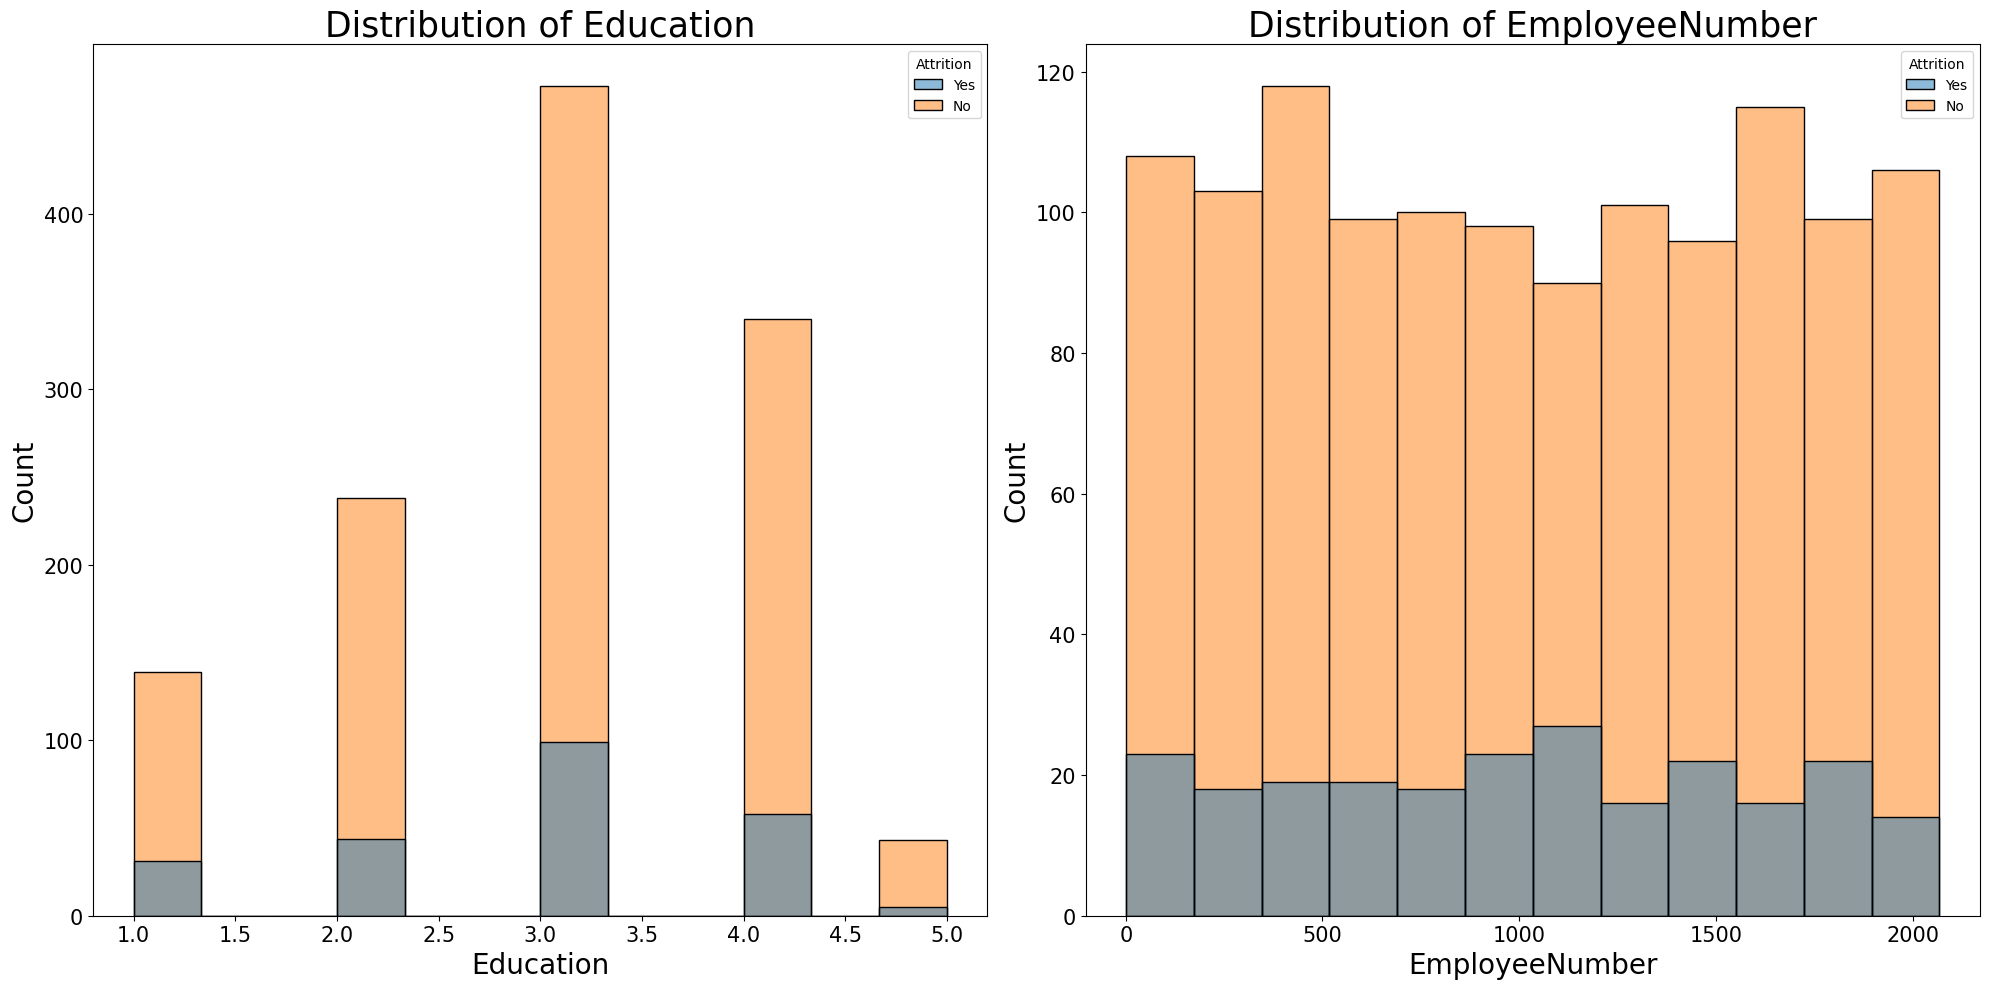

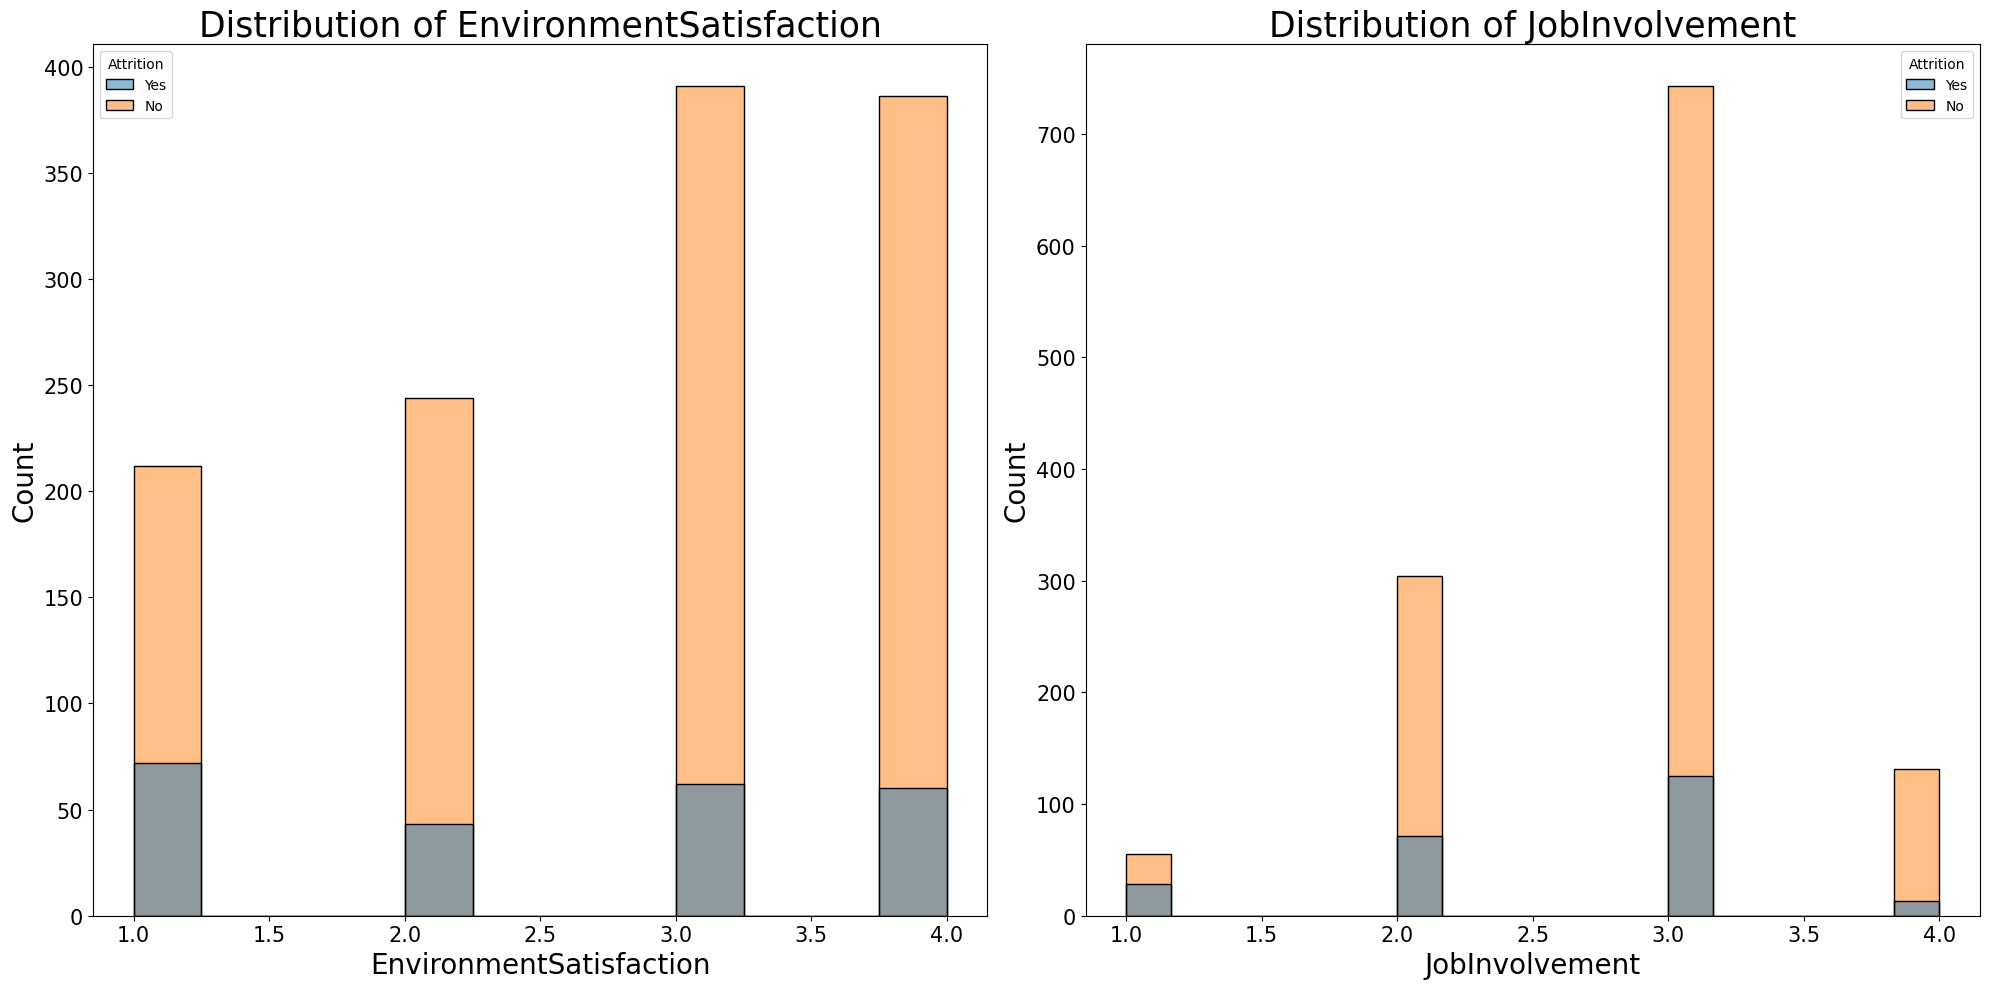

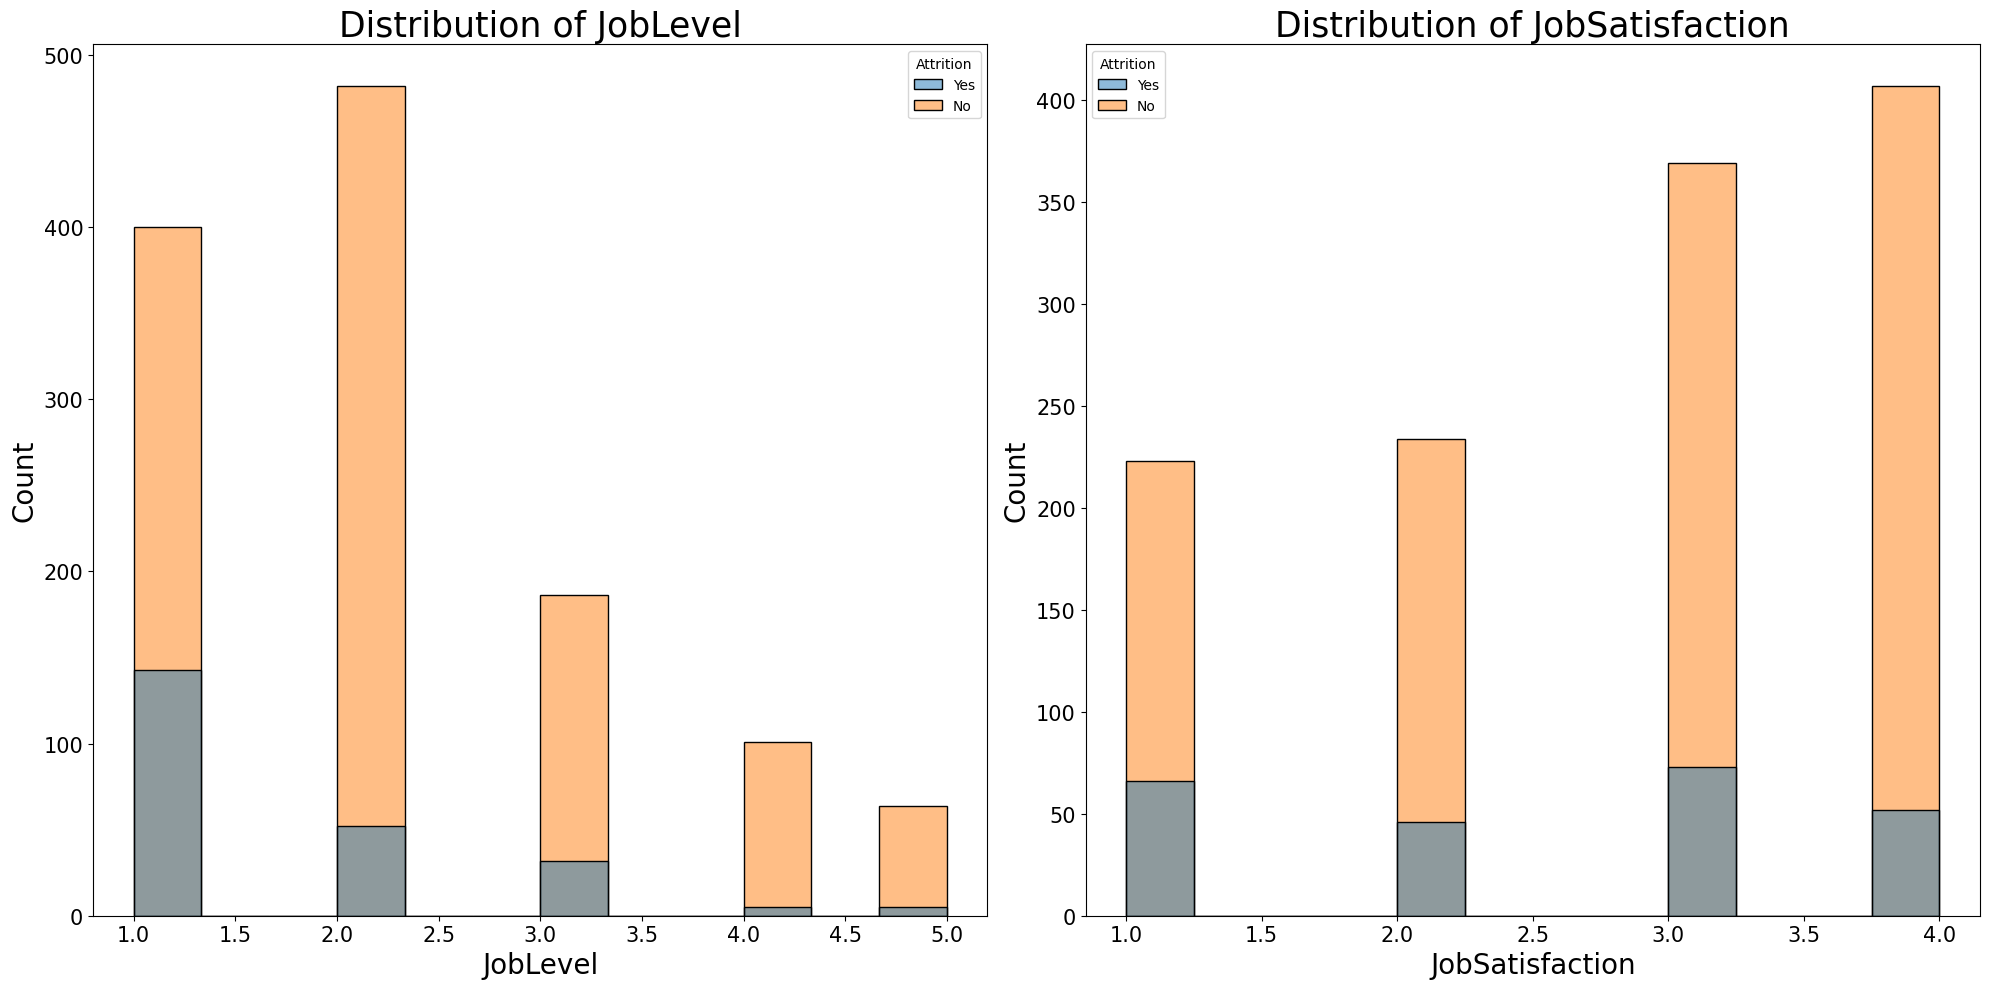

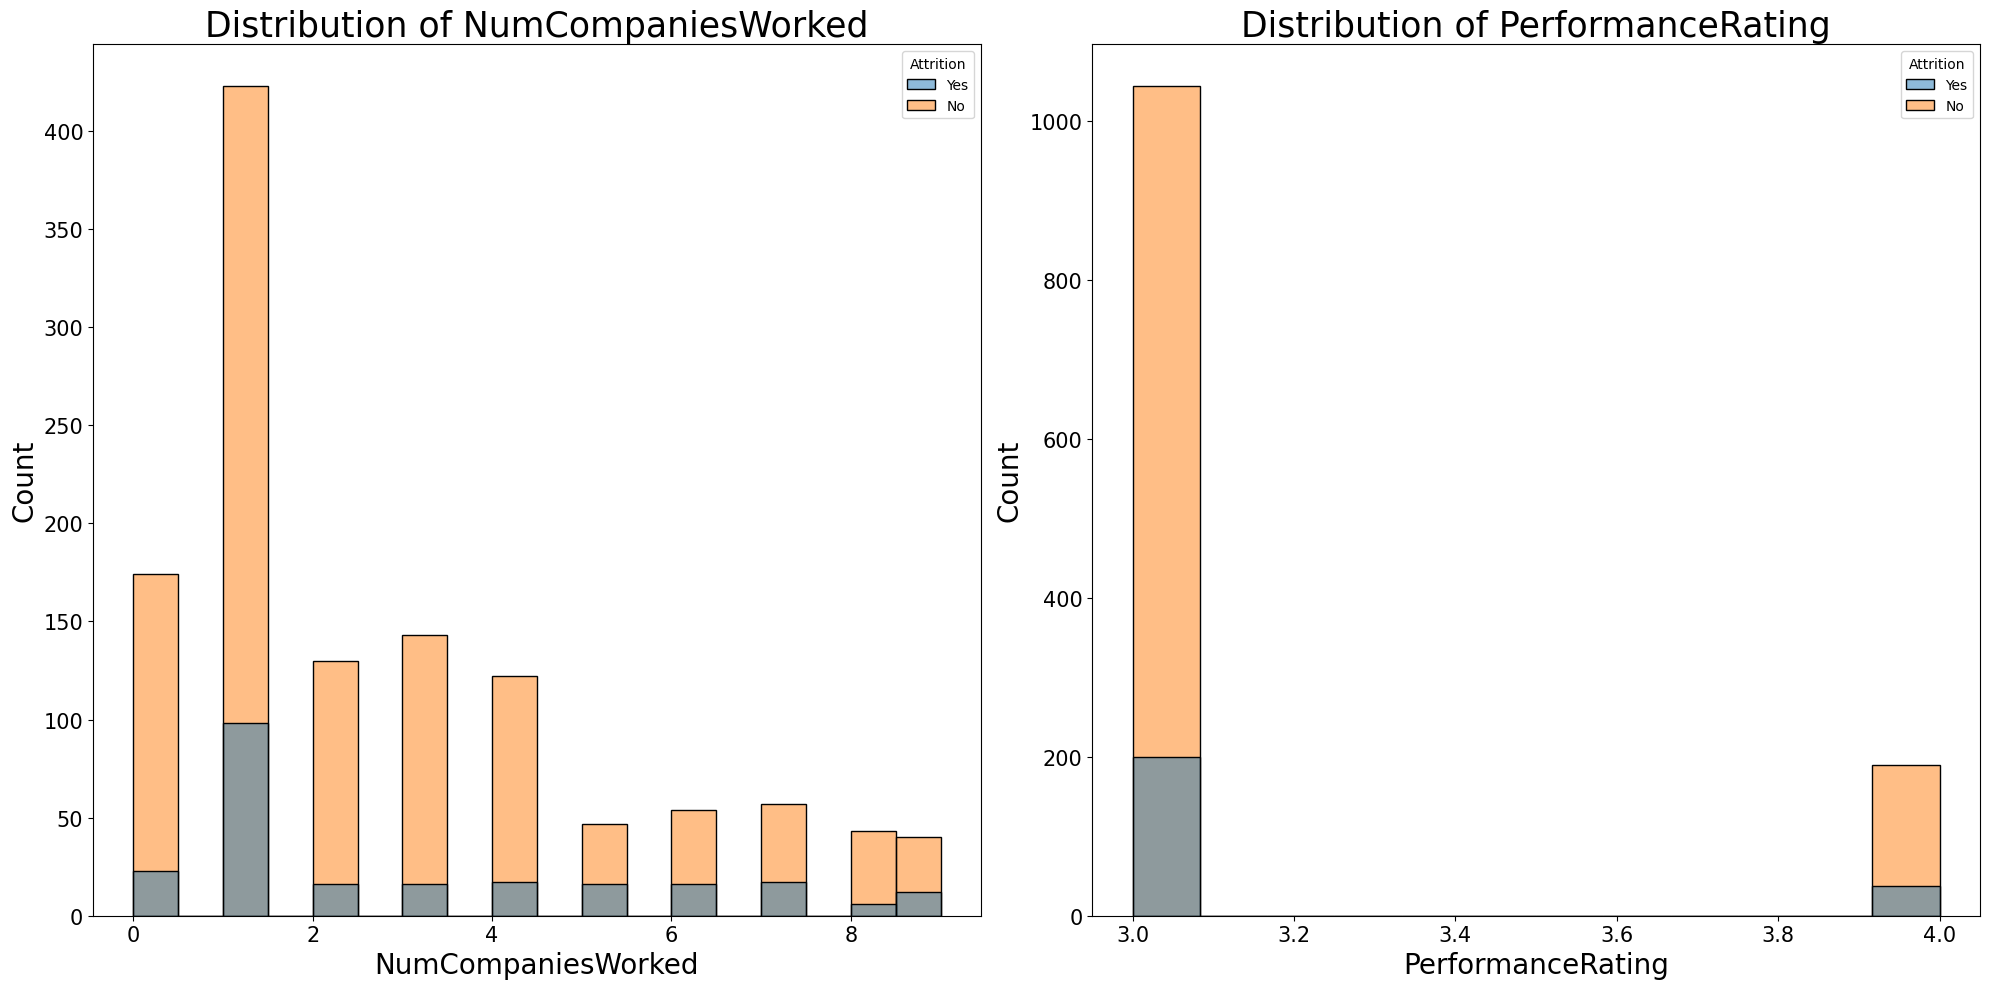

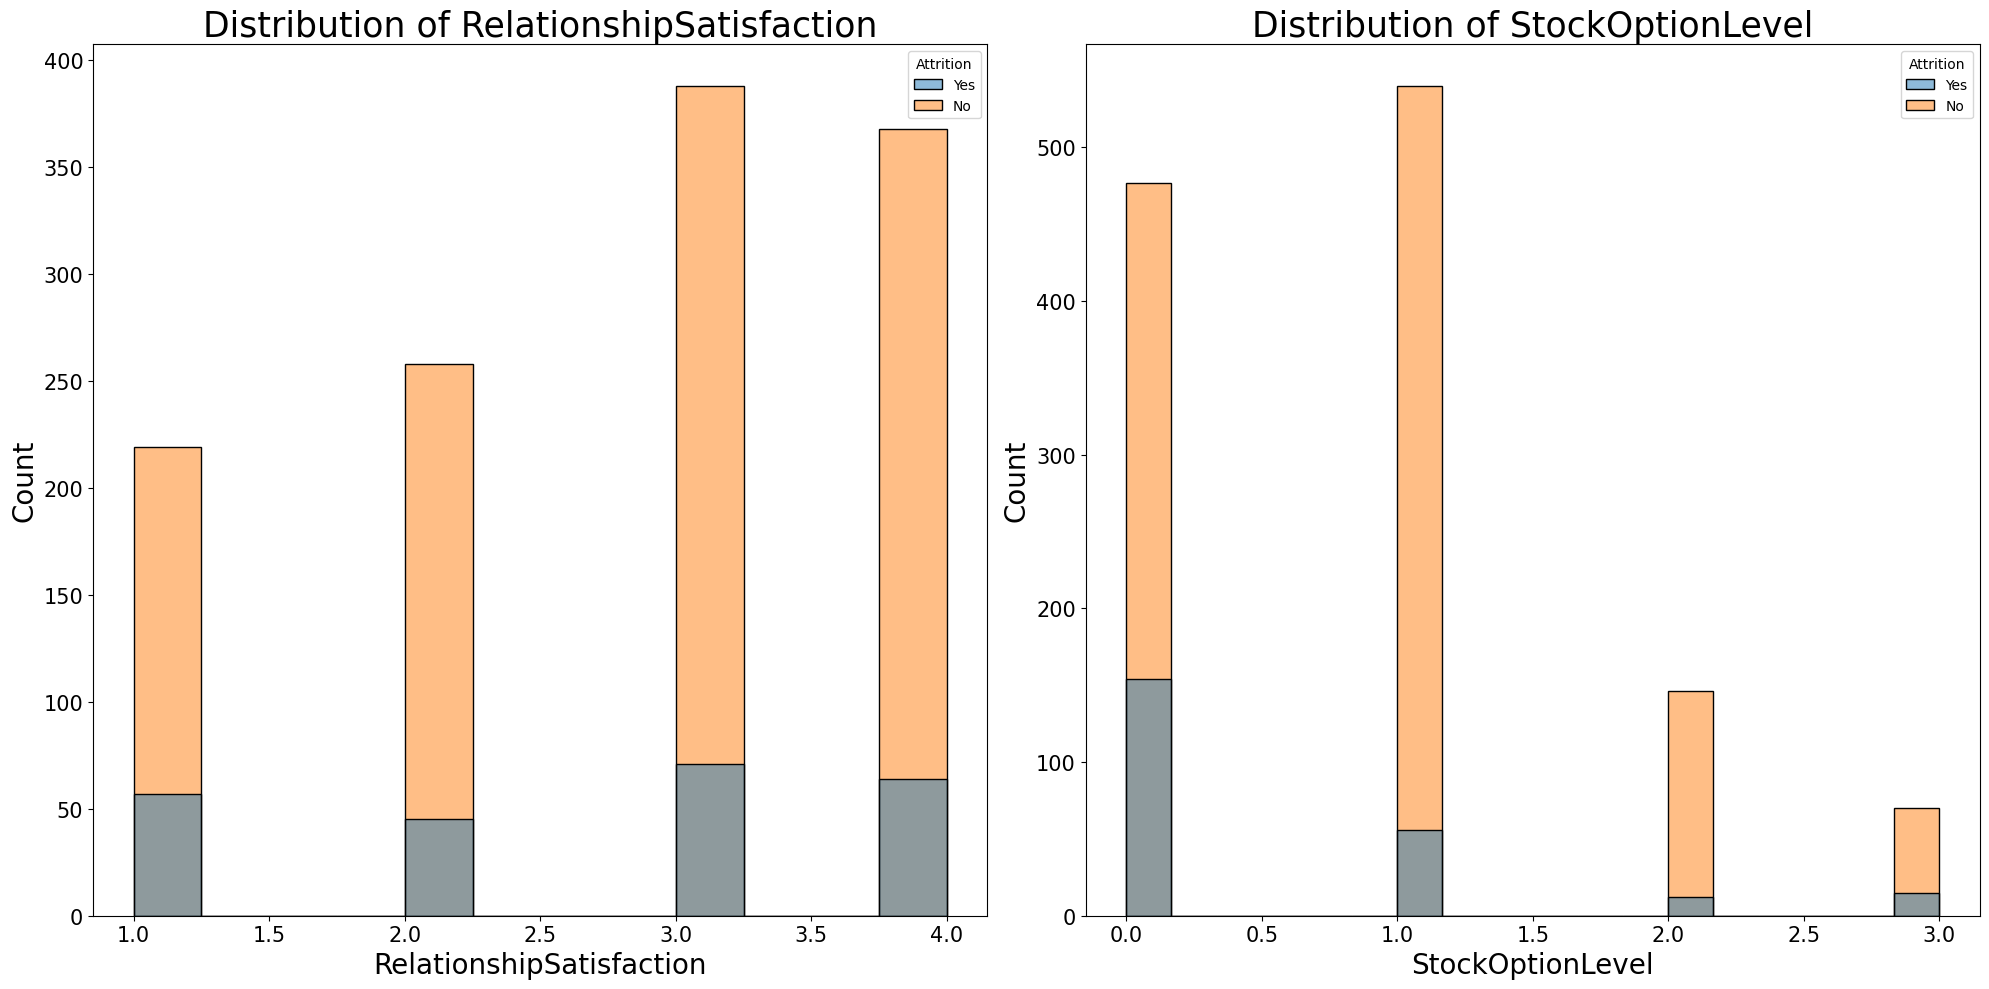

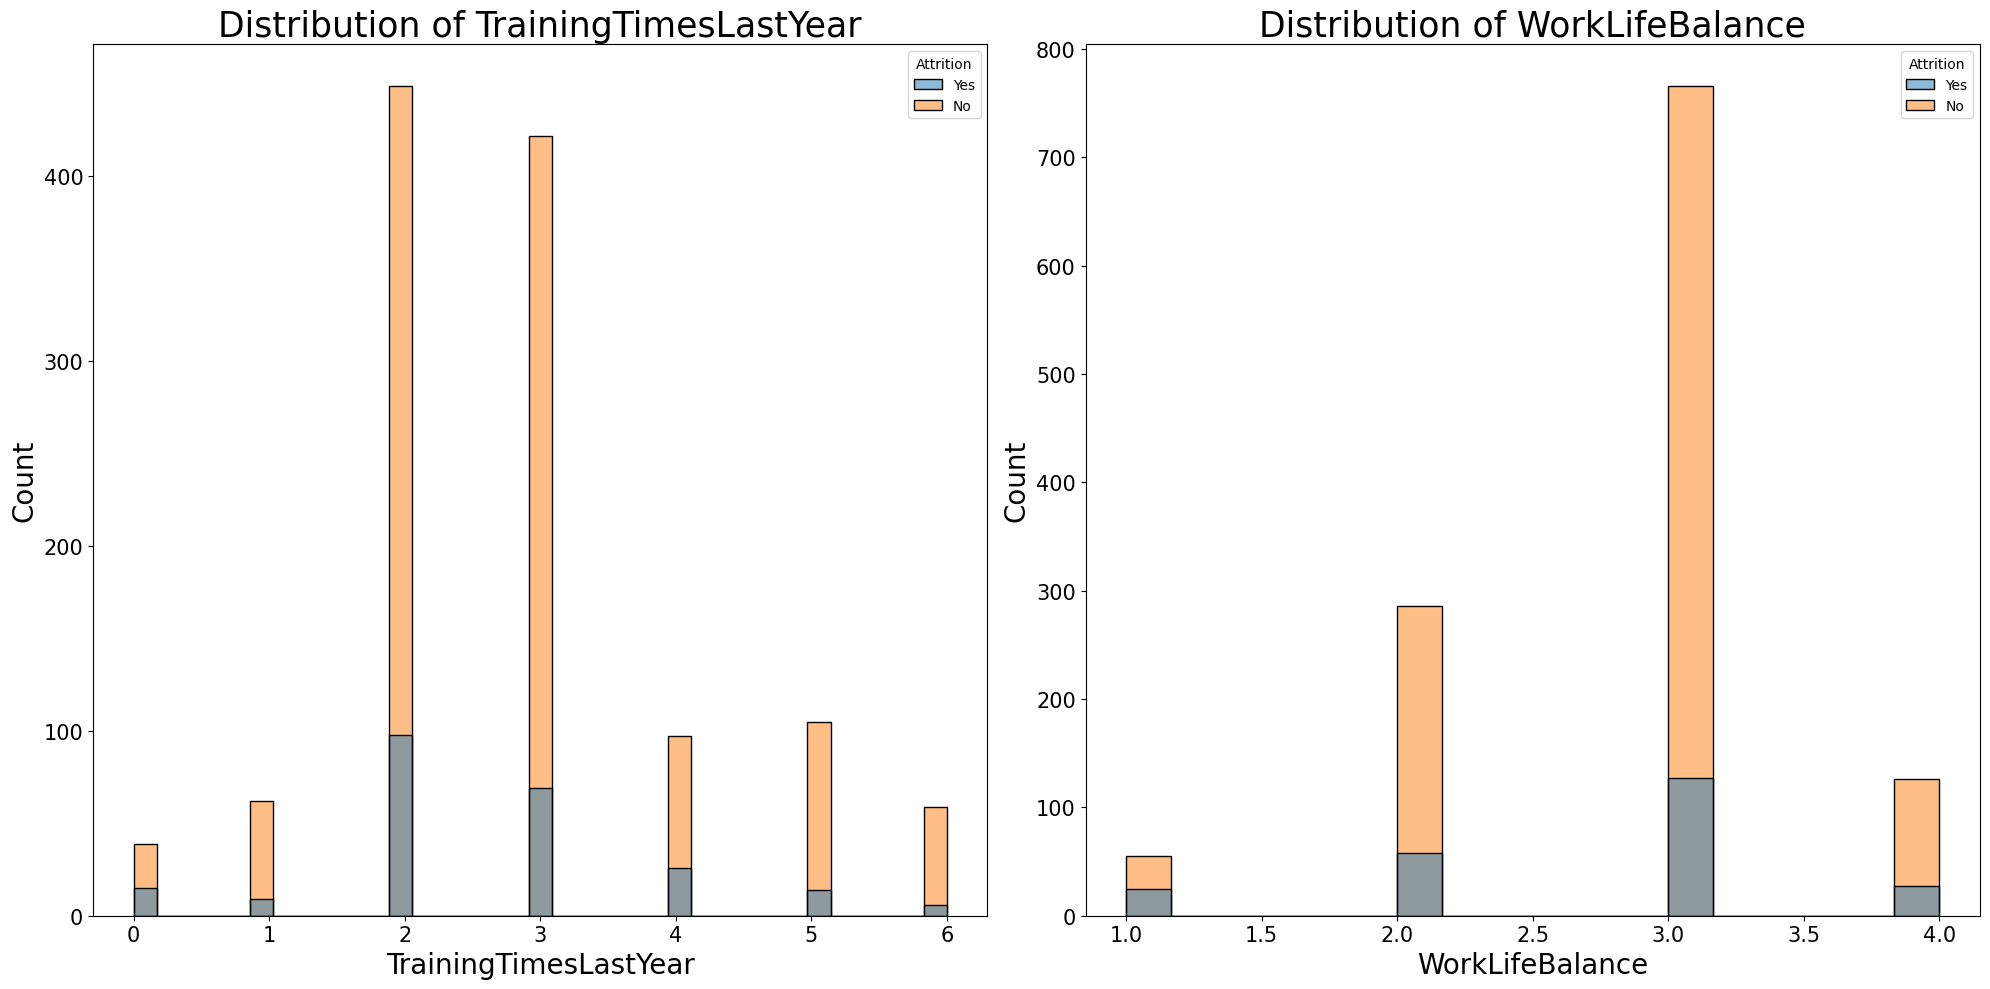

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_in_pairs(dataset3, hue_column):
    columns = dataset3.columns
    num_columns = len(columns)
    pair_count = 2 

    for i in range(0, num_columns, pair_count):
        plt.figure(figsize=(20, 10), facecolor='white') 

        for j in range(pair_count):
            if i + j < num_columns:  
                ax = plt.subplot(1, pair_count, j + 1) 
                
                sns.histplot(
                    x=dataset3[columns[i + j]].dropna(), 
                    hue=hue_column, 
                    kde=False, 
                    ax=ax
                )
                
                plt.xlabel(columns[i + j], fontsize=20)
                plt.ylabel('Count', fontsize=20)
                ax.set_title(f'Distribution of {columns[i + j]}', fontsize=25)
                ax.tick_params(axis='both', which='major', labelsize=15)
        
        plt.tight_layout()
        plt.show()

plot_in_pairs(dataset3, hue_column=dataset.Attrition)


# 1 IMPACT OF ENVIRNMENT AND JOB SATISFACTION ON ATTRITION 

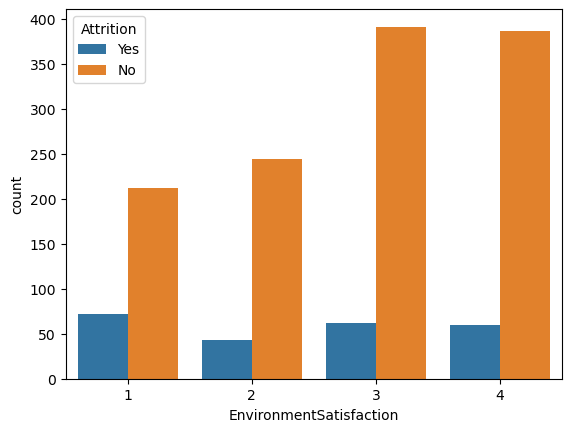

In [87]:
#plt.figure(figsize=(8,6),facecolor='white')
sns.countplot(x=dataset.EnvironmentSatisfaction,hue=dataset.Attrition)
plt.show()

--> Increase in rate of environment as well as job satisfaction give rise to increase in Attrtion "no"(means not willing to quit)

# 2 HOW JOB LEVEL IMPACTING ON ATTRITION 

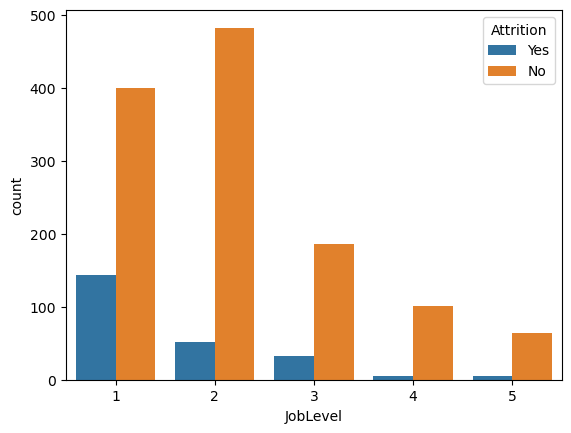

In [88]:
#plt.figure(figsize=(8,6),facecolor='white')
sns.countplot(x=dataset.JobLevel,hue=dataset.Attrition)
plt.show()

--> Increase in job level .Decrease in chances of leaving the company for Employees

# 3 JOBINVOLVEMENT IMPACT ON ATTRITION 

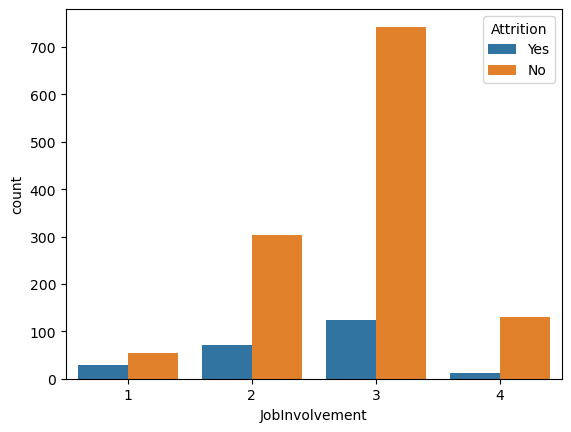

In [89]:
#plt.figure(figsize=(8,6),facecolor='white')
sns.countplot(x=dataset.JobInvolvement,hue=dataset.Attrition)
plt.show()

--> The employees who involved in job more than sufficient are more likely to quit or we can say that they have mmore pressure of work

--> Somehow. there are some emp. who not involvd fully in there job but still they are likely to quit

#  4 IMPACT OF STOCK OPTION LEVEL ON ATTRITION 

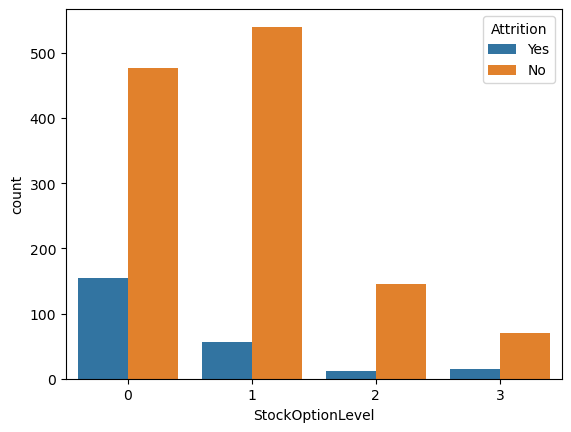

In [90]:
#plt.figure(figsize=(8,6),facecolor='white')
sns.countplot(x=dataset.StockOptionLevel,hue=dataset.Attrition)
plt.show()

-->For the employees who're not having stock option are likely to quit

# 5 PERFORMANCE RATING AND ATTRITION 

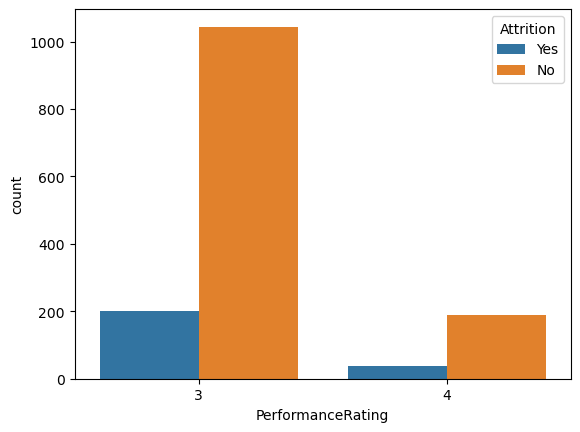

In [91]:
#plt.figure(figsize=(8,6),facecolor='white')
sns.countplot(x=dataset.PerformanceRating,hue=dataset.Attrition)
plt.show()

--> On an average,most of the employees are moderately performed(because performance rating lies in 3-4).

--> However employees having less performance rating are more likely to quit we can say that company wants to fire that employees

# 6 WORK LIFE BALANCE IMPACT ON ATTRITION 

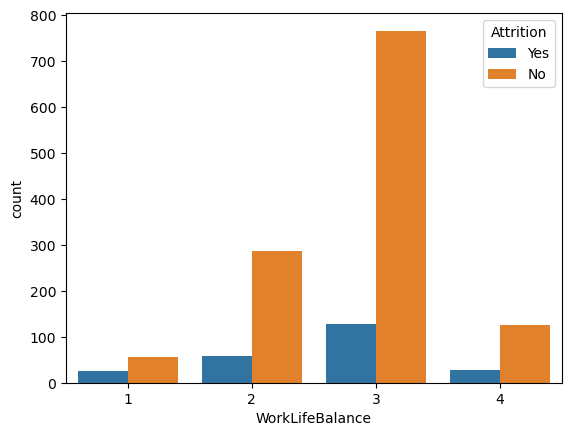

In [92]:
#plt.figure(figsize=(8,6),facecolor='white')
sns.countplot(x=dataset.WorkLifeBalance,hue=dataset.Attrition)
plt.show()

--> More the employees life is balance ,lesser the Attrition.